# **TEECE 2 Capstone Project**

# Lifestyle and Learning – Predicting Student Performance


**I. Introduction**

This project utilizes a simulated dataset of 1,000 student records sourced from Kaggle. Each record
captures key lifestyle habits—such as study hours, sleep patterns, screen time, diet, and mental health—
and relates them to academic performance, specifically the final exam score. The dataset is ideal for
educational machine learning applications, enabling learners to perform data preprocessing, visualization,
clustering, regression, and classification.

You are tasked with analyzing how these lifestyle factors affect student performance, and building predictive
models based on insights you derive.

**II. Project Goals**

• Determine relationships between lifestyle habits and final exam scores

• Discover meaningful student groupings based on lifestyle through clustering

• Build and evaluate models that predict academic performance

• Summarize and communicate findings through data storytelling


In [ ]:
!pip uninstall patsy -y
!pip install patsy
!pip install pandas==2.2.2
!pip install seaborn matplotlib




Found existing installation: patsy 1.0.1
Uninstalling patsy-1.0.1:
  Successfully uninstalled patsy-1.0.1
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



data = pd.read_excel('student_habits_performance.xlsx')

# Display the first few rows of the dataset
print(data.head())
print(data.shape)
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Basic statistics
print(data.describe())


  student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average  

**III. Project Components**


# 1. Problem Definition

## How do various lifestyle factors influence the academic performance of students in examinations?

1. How does lifestyle habits (positive or negative) of students today affect the academic performance in examinations?

2. Does having a part time job or extracurricular participation affect exam scores negatively?

3. Does the educational level of parents affect the student's academic performance in examinations?

4. Does the internet quality affects study hours of students? if the internet is good does the students lean more on studying or streaming on netflix and scrolling on social media?




# 2. Data Understanding and Preprocessing

• Load and inspect the dataset

• Handle:

    o Missing values

    o Categorical variables (apply label/one-hot encoding)

    o Scaling (for models like K-Means and regression)

• Engineer new features if helpful (e.g., combine screen time metrics)

In [ ]:

# Handle missing values
data['parental_education_level'] = data['parental_education_level'].fillna('Unknown')

# Use LabelEncoder for ordinal categorical variables or OneHotEncoder for
# nominal variables

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['gender', 'part_time_job', 'diet_quality', 'internet_quality', 'extracurricular_participation']

for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])




In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_columns = ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
                        'attendance_percentage', 'sleep_hours', 'exercise_frequency',
                        'mental_health_rating', 'exam_score']

data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


In [ ]:
# Total Screen Time
data['total_screen_time'] = data['social_media_hours'] + data['netflix_hours']

# Study Efficiency
data['study_efficiency'] = data['study_hours_per_day'] / (data['total_screen_time'] + 1)

# Sleep Quality
data['sleep_quality'] = (data['sleep_hours'] >= 7).astype(int)

# Attendance and Study Hours Interaction
data['attendance_study_interaction'] = data['attendance_percentage'] * data['study_hours_per_day']

# Exam Score Binning
bins = [0, 60, 75, 100]
labels = ['Low', 'Average', 'High']
data['performance_level'] = pd.cut(data['exam_score'], bins=bins, labels=labels, include_lowest=True)

# Mental Health Rating Normalization
data['mental_health_rating_normalized'] = (data['mental_health_rating'] - data['mental_health_rating'].mean()) / data['mental_health_rating'].std()


# 3. Exploratory Data Analysis (EDA)


• Visualizations:

    o Histograms for feature distributions

    o Scatter plots and box plots for comparing habits vs. scores

    o Correlation heatmap


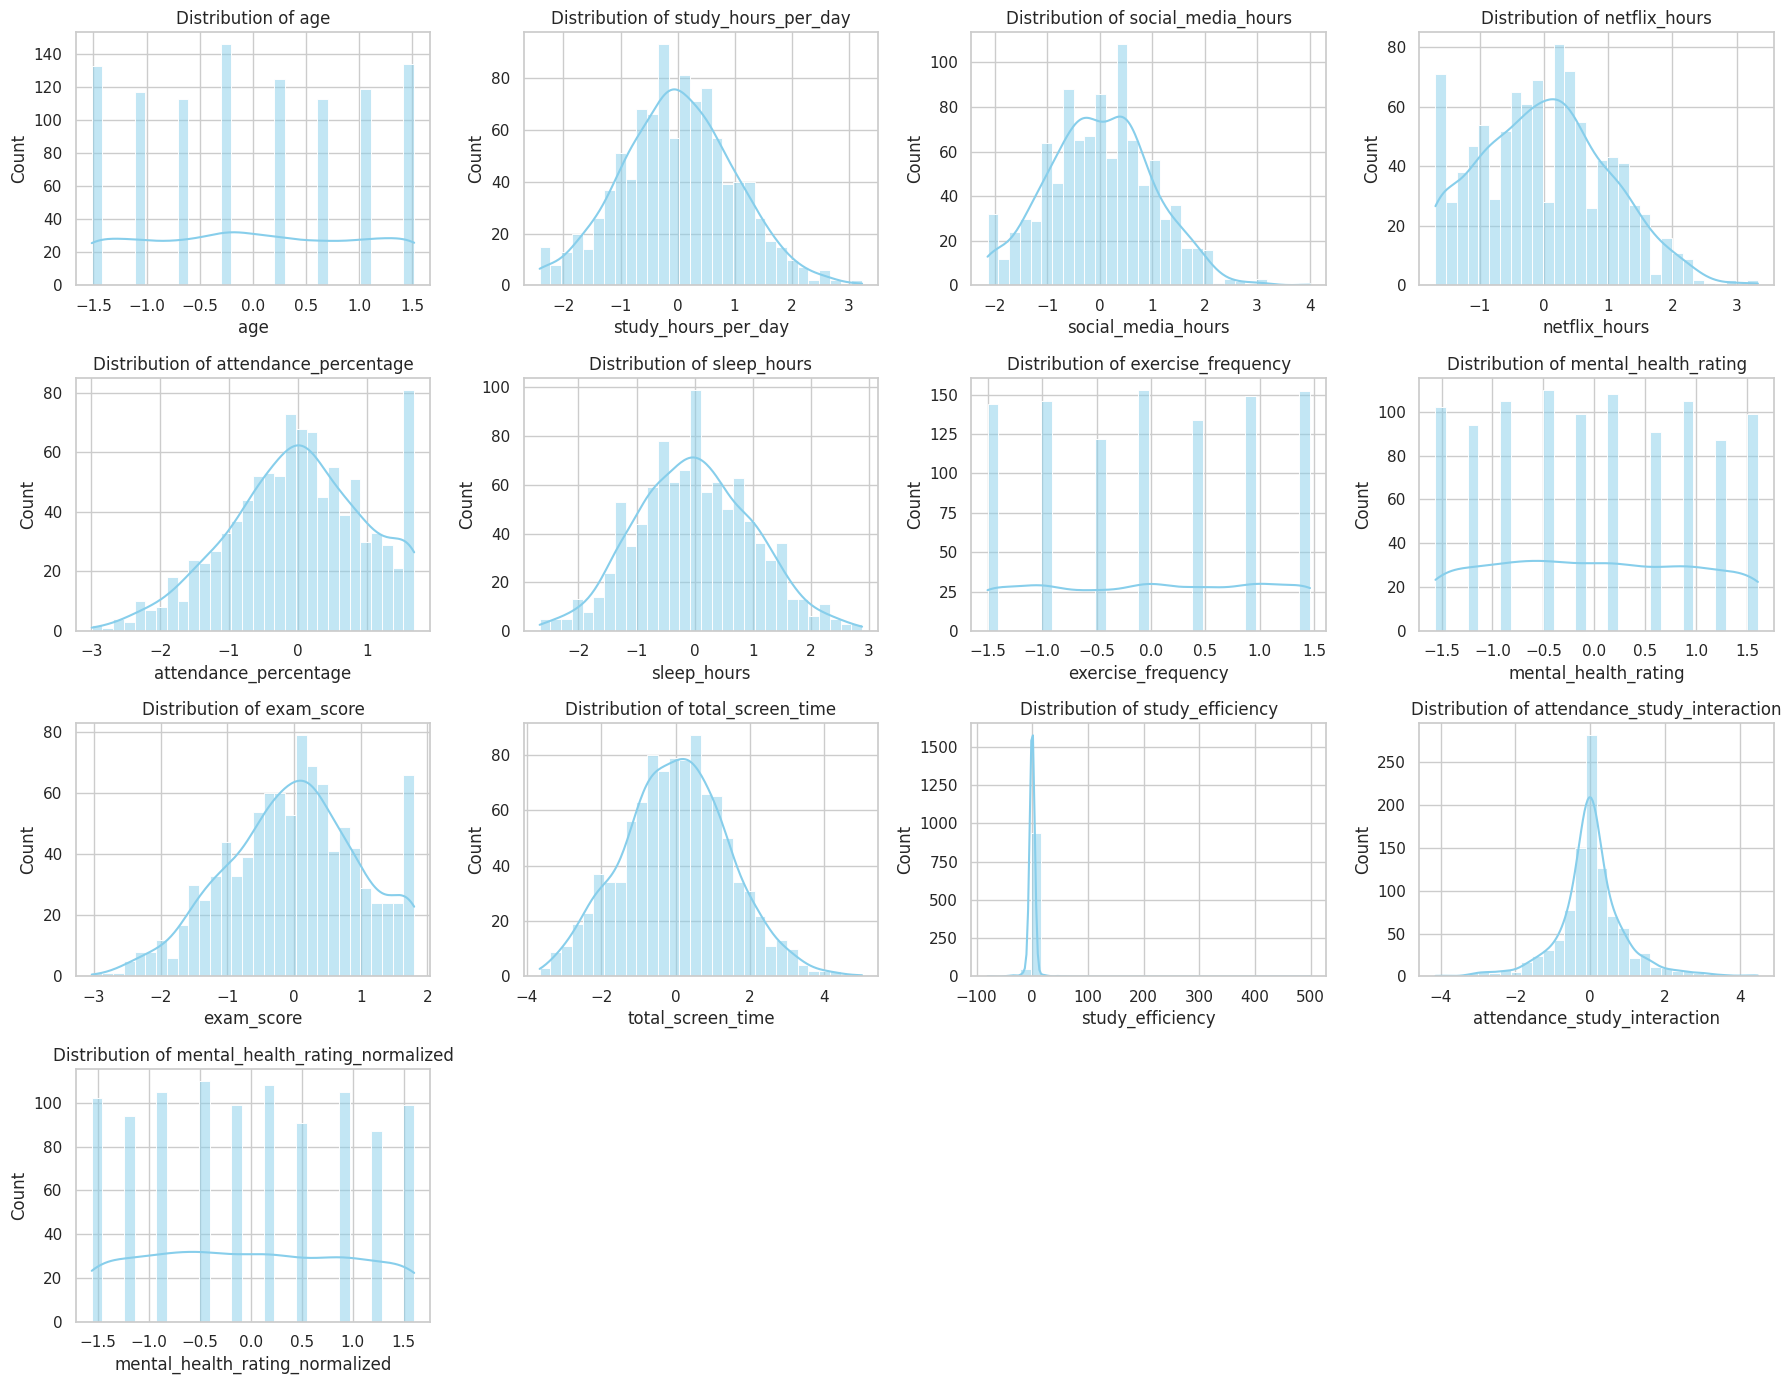

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Numerical habit features to analyze against exam score
habit_features = [
    'study_hours_per_day', 'social_media_hours', 'netflix_hours',
    'attendance_percentage', 'sleep_hours', 'exercise_frequency',
    'mental_health_rating', 'total_screen_time', 'study_efficiency',
    'attendance_study_interaction', 'mental_health_rating_normalized', 'sleep_quality'
]

# 1. Histograms for all numerical features including engineered ones
all_numerical = [
    'age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
    'attendance_percentage', 'sleep_hours', 'exercise_frequency',
    'mental_health_rating', 'exam_score', 'total_screen_time',
    'study_efficiency', 'attendance_study_interaction', 'mental_health_rating_normalized'
]

plt.figure(figsize=(18, 14))
for i, feature in enumerate(all_numerical):
    plt.subplot(4, 4, i + 1)
    sns.histplot(data[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()



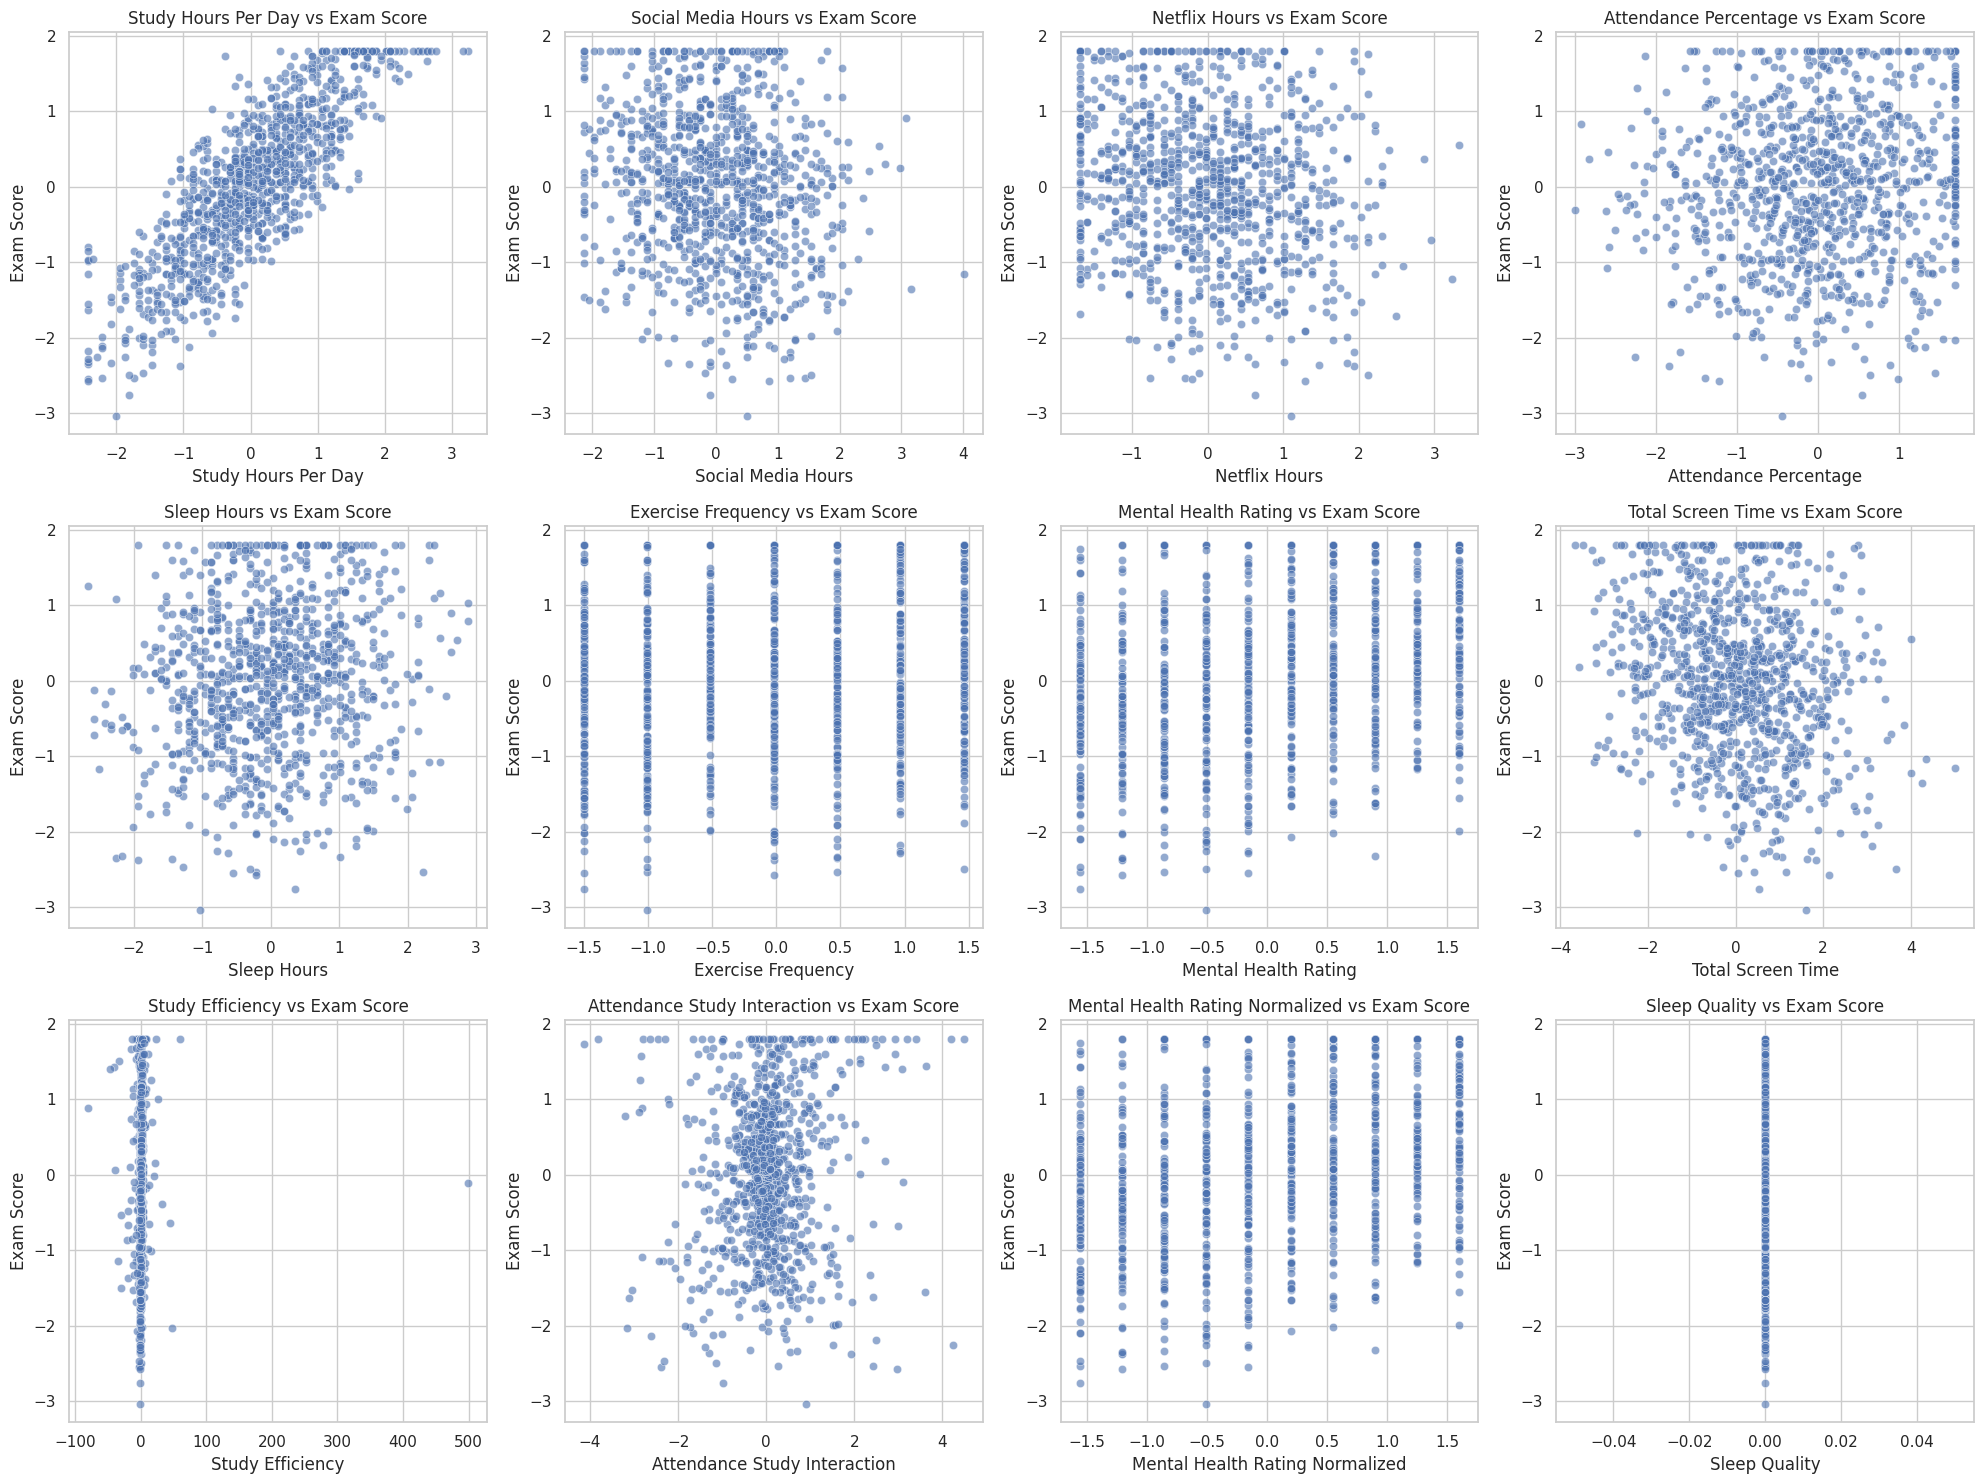

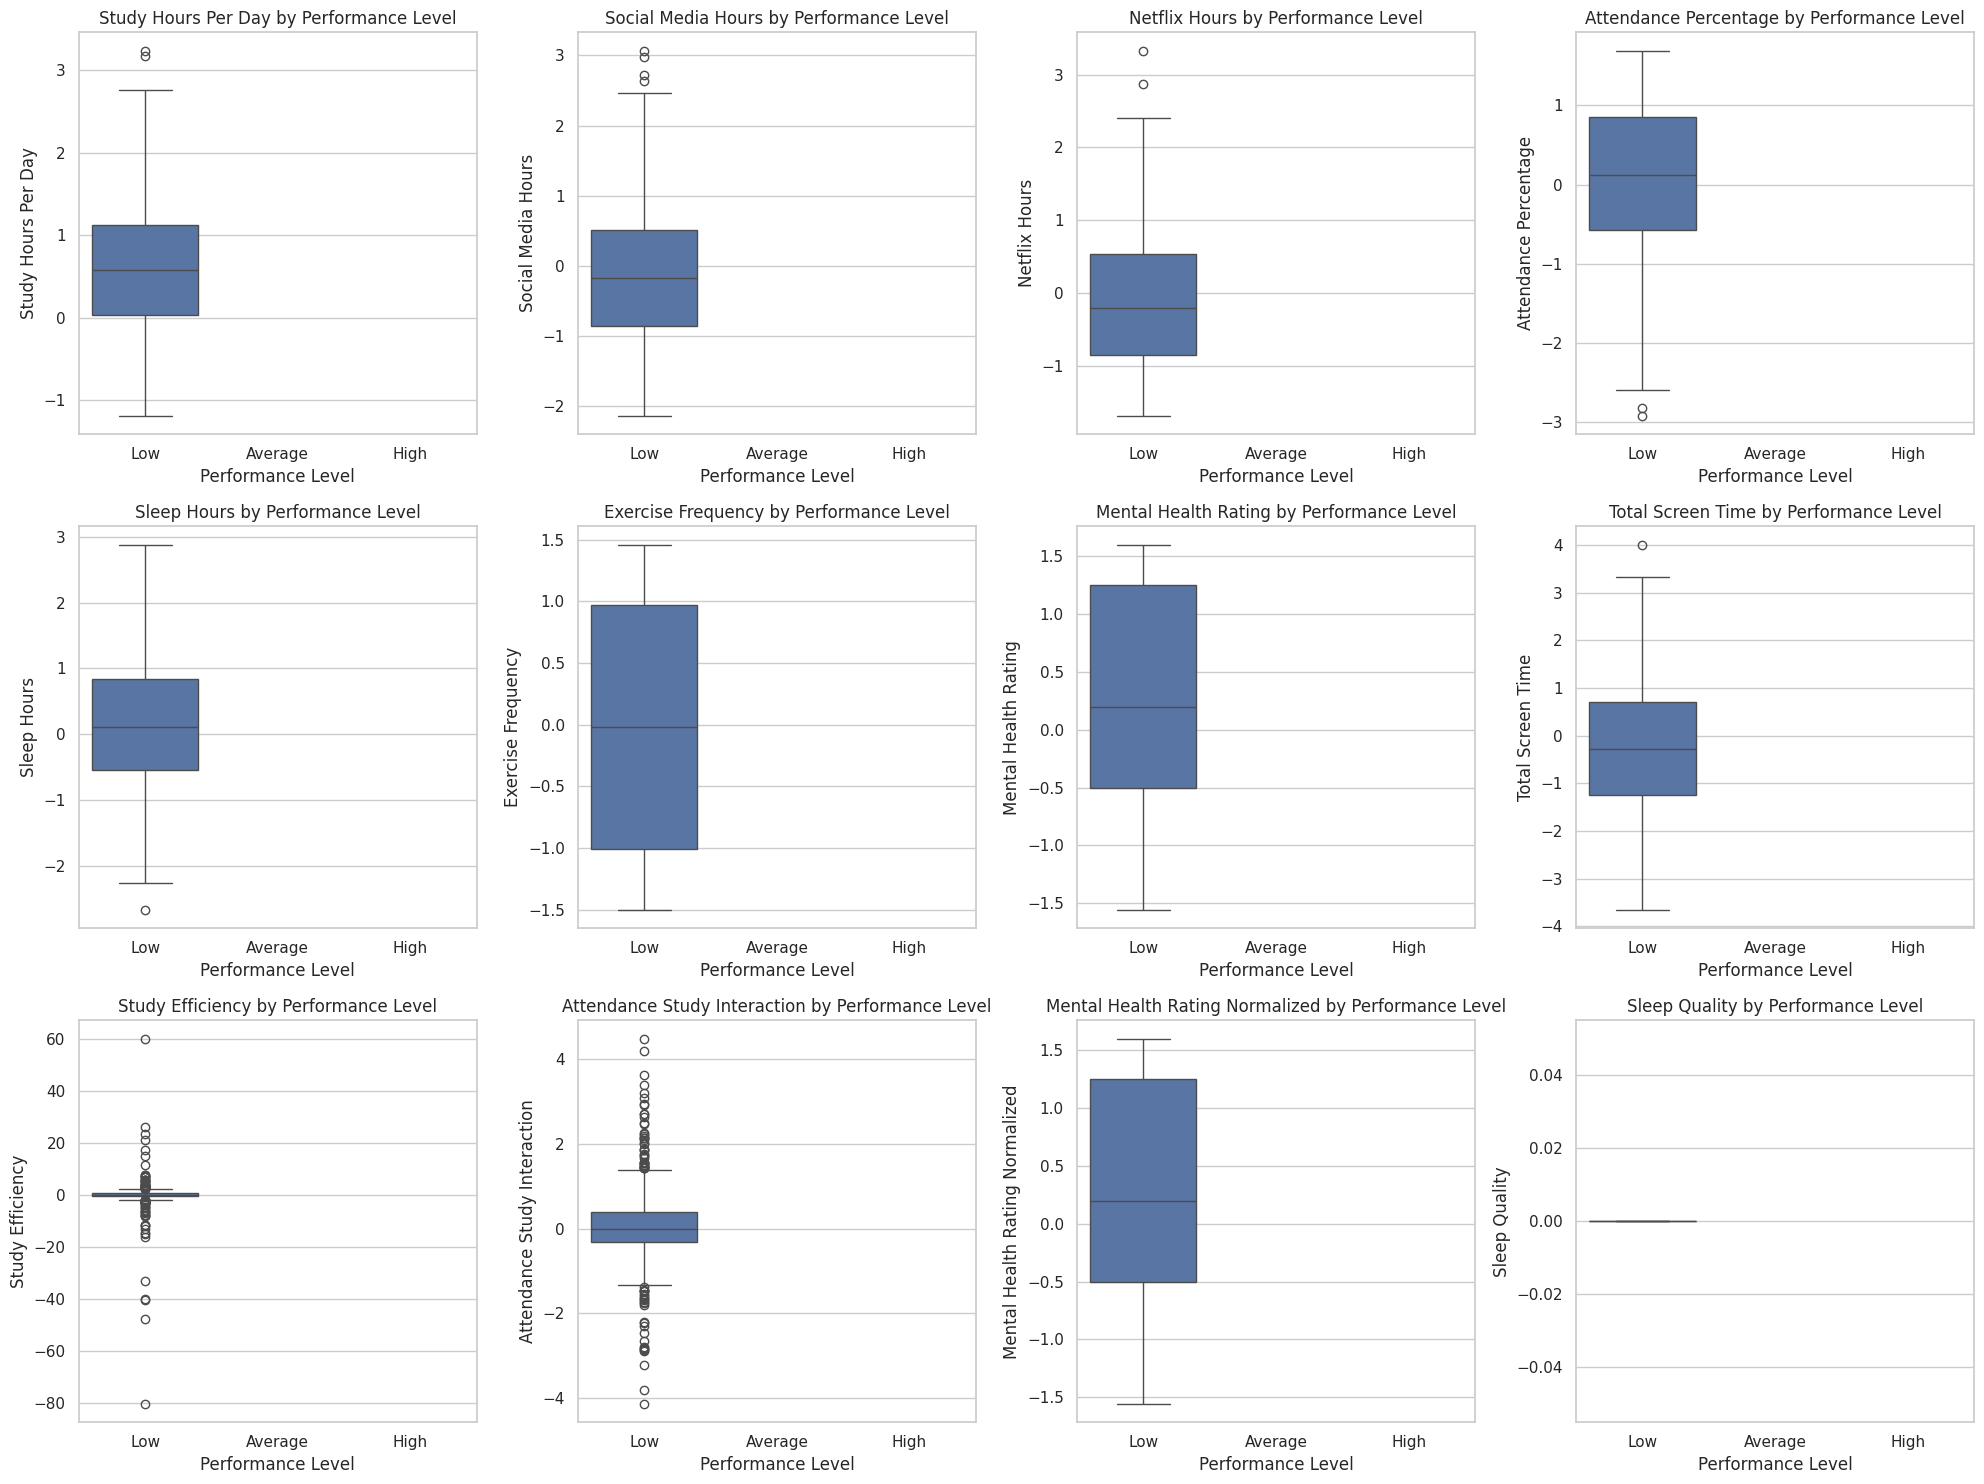

In [ ]:
# 2. Scatter plots: All habit features vs Exam Score
nplots = len(habit_features)
cols = 4
rows = (nplots + cols - 1) // cols

plt.figure(figsize=(20, rows * 5))
for i, feature in enumerate(habit_features):
    plt.subplot(rows, cols, i + 1)
    sns.scatterplot(x=feature, y='exam_score', data=data, alpha=0.6)
    plt.title(f'{feature.replace("_", " ").title()} vs Exam Score')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Exam Score')
plt.tight_layout()
plt.show()



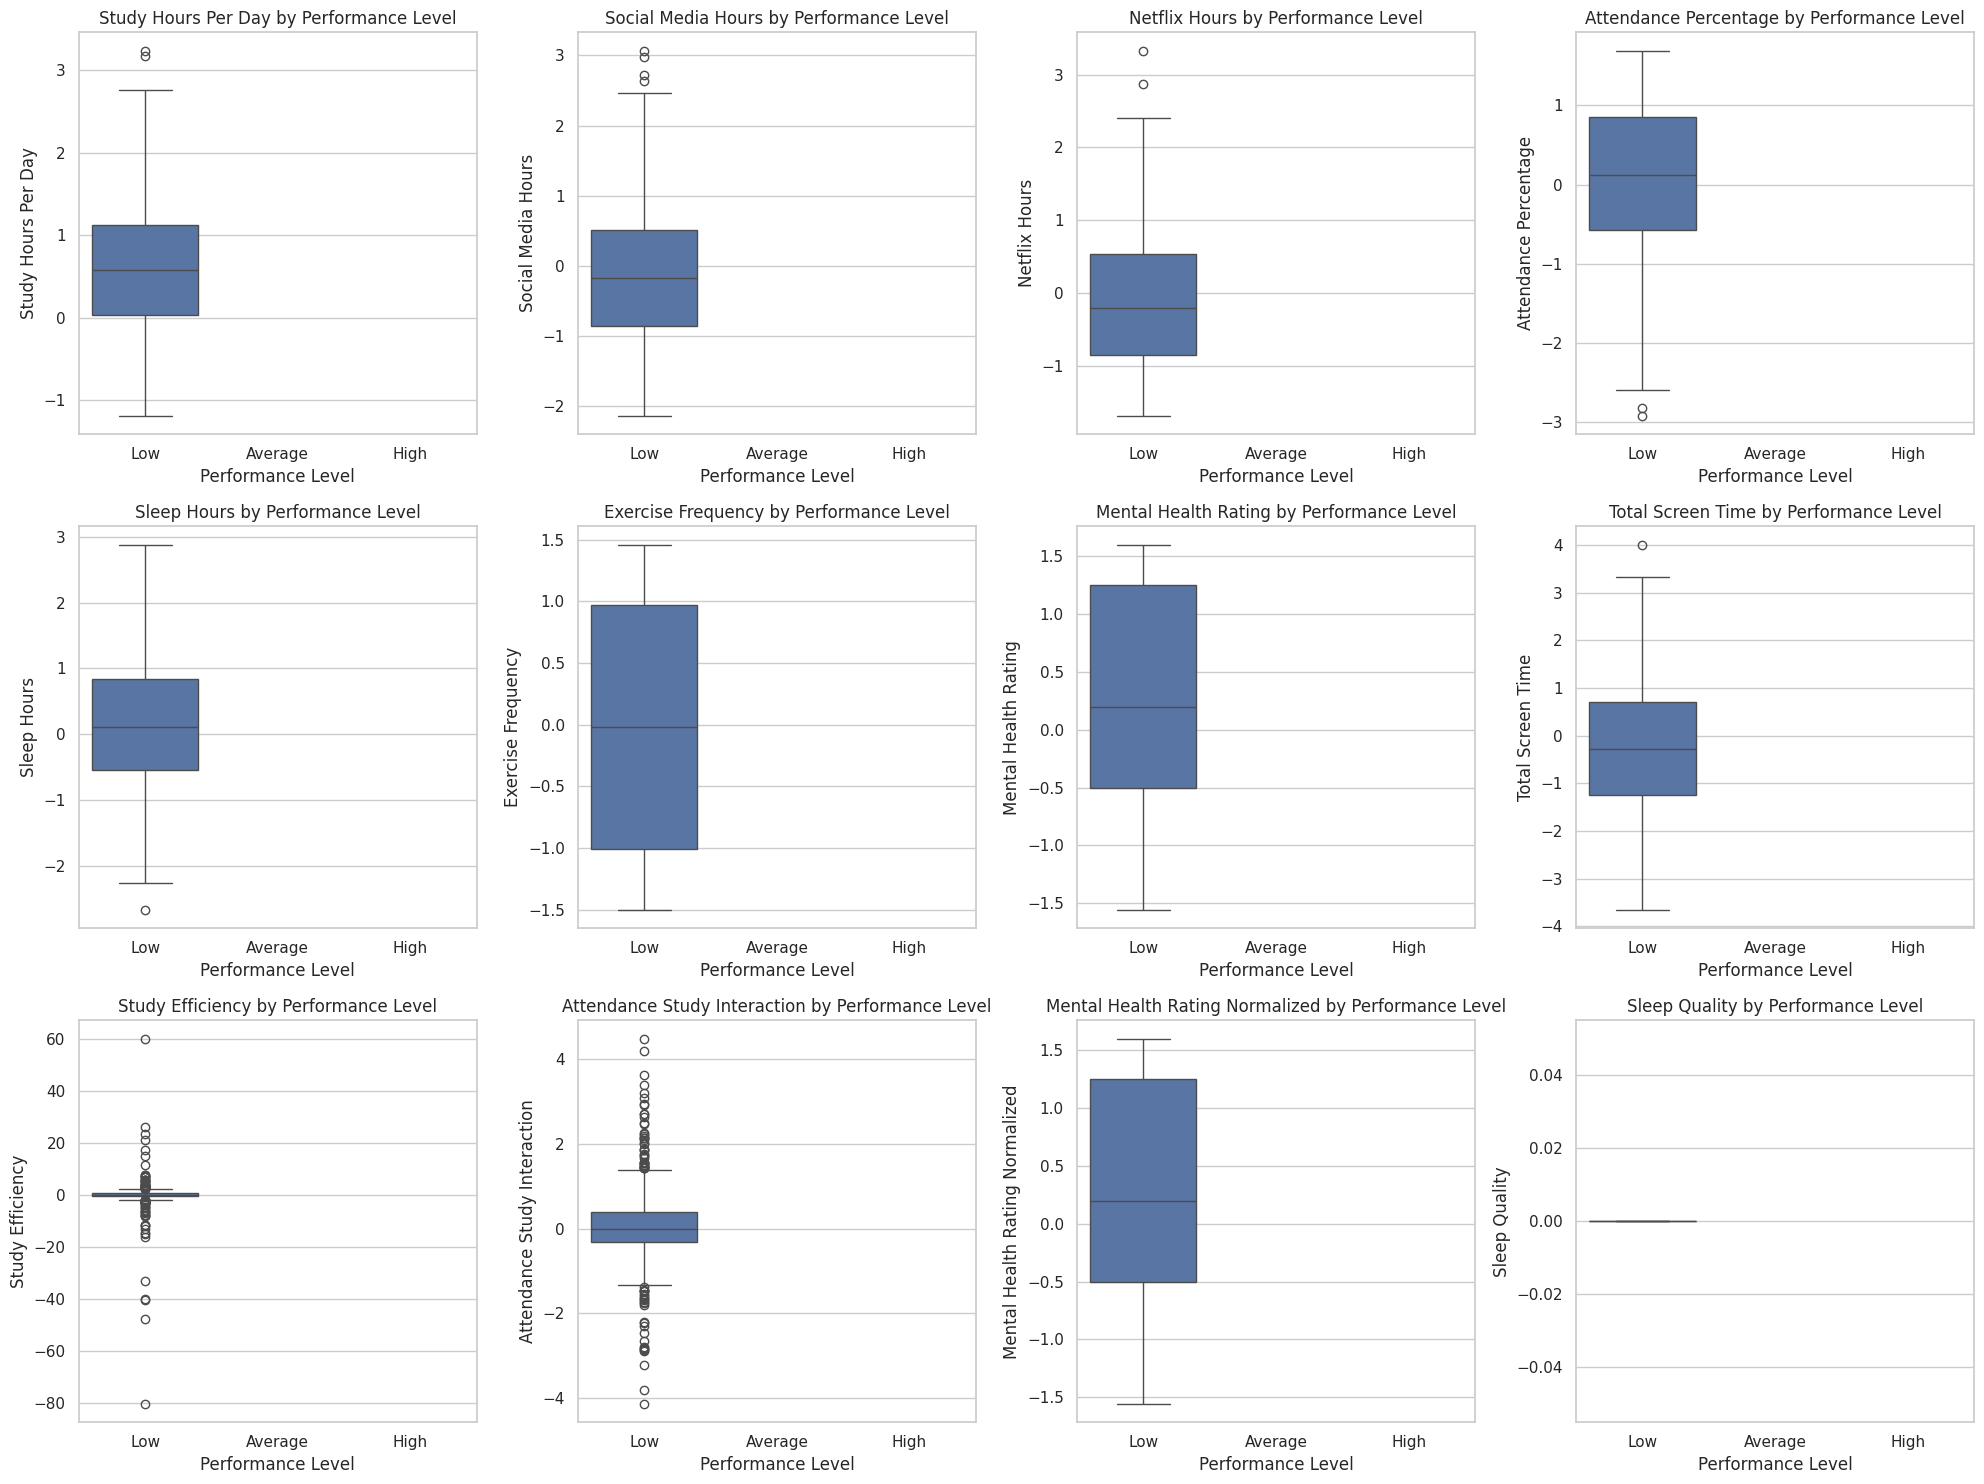

In [ ]:
# 3. Box plots: Habit features grouped by 'performance_level'
if 'performance_level' in data.columns:
    plt.figure(figsize=(20, rows * 5))
    for i, feature in enumerate(habit_features):
        plt.subplot(rows, cols, i + 1)
        sns.boxplot(x='performance_level', y=feature, data=data)
        plt.title(f'{feature.replace("_", " ").title()} by Performance Level')
        plt.xlabel('Performance Level')
        plt.ylabel(feature.replace("_", " ").title())
    plt.tight_layout()
    plt.show()


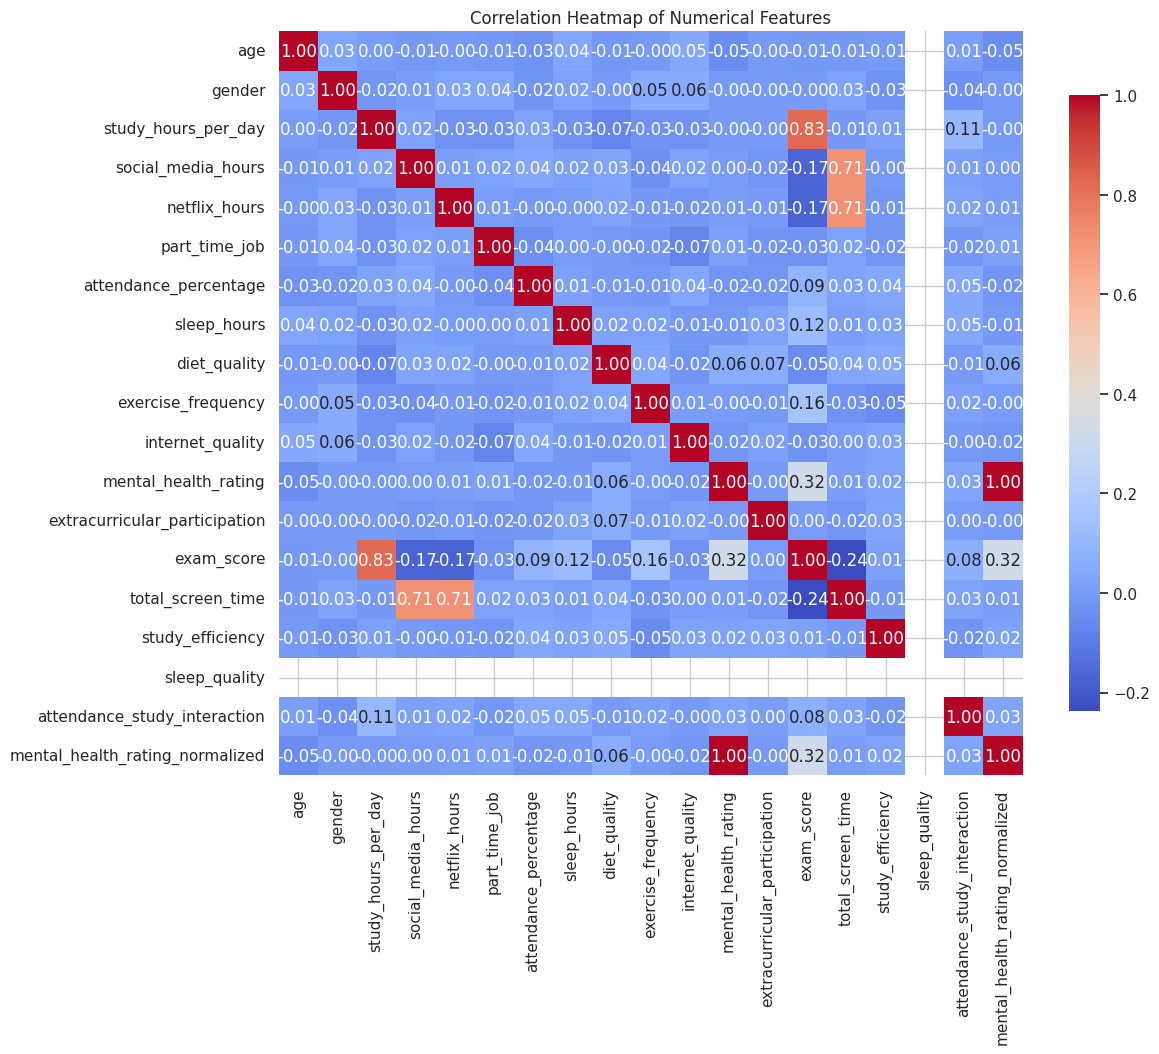

In [ ]:
# 4. Correlation heatmap remains the same: show for numeric columns
plt.figure(figsize=(12, 10))
corr_matrix = data.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


# 4. Clustering (Unsupervised Learning)


• Apply K-Means clustering using lifestyle features (excluding exam score)

• Determine optimal K using:

    o Elbow method (inertia plot)

    o Silhouette score

• Label and describe each cluster


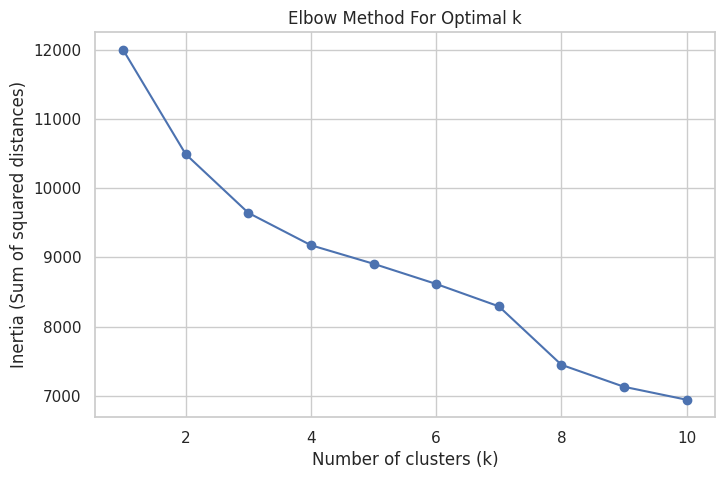

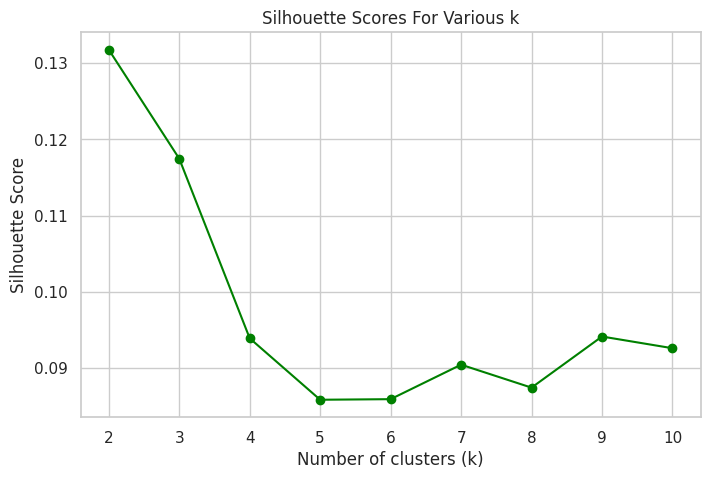

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Assume 'data' is the preprocessed DataFrame with engineered features already set up
# Define lifestyle features (exclude 'exam_score' and non-feature columns)
lifestyle_features = [
    'age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
    'attendance_percentage', 'sleep_hours', 'exercise_frequency',
    'mental_health_rating', 'total_screen_time', 'study_efficiency',
    'attendance_study_interaction', 'mental_health_rating_normalized', 'sleep_quality'
]

# Extract features for clustering
X = data[lifestyle_features].copy()

# Scale features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal K using Elbow method
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.title('Elbow Method For Optimal k')
plt.show()

# Determine optimal K using Silhouette score
sil_scores = []
k_values_sil = range(2, 11)
for k in k_values_sil:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(k_values_sil, sil_scores, marker='o', color='green')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores For Various k')
plt.show()



In [ ]:
# Choose optimal K based on plots (e.g., 3) and fit
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to original data
data['cluster'] = cluster_labels

# Compute mean values of features by cluster to profile clusters
cluster_profiles = data.groupby('cluster')[lifestyle_features].mean()
print("Cluster Profiles (means of features):")
print(cluster_profiles)

# Describe clusters with sample labels and profiling text
def describe_clusters(profiles):
    descriptions = []
    for cluster_id, row in profiles.iterrows():
        desc = f"Cluster {cluster_id} description:\n"
        if row['study_hours_per_day'] > 0:
            desc += "- Higher study hours indicating diligent study habits.\n"
        else:
            desc += "- Lower study hours indicating less study focus.\n"
        if row['social_media_hours'] > 0:
            desc += "- Higher social media usage suggesting more leisure time online.\n"
        else:
            desc += "- Lower social media usage.\n"
        if row['mental_health_rating'] > 0:
            desc += "- Better mental health ratings.\n"
        else:
            desc += "- Lower mental health ratings, potential concern.\n"
        if row['attendance_percentage'] > 0:
            desc += "- Good attendance.\n"
        else:
            desc += "- Poor attendance.\n"
        descriptions.append(desc)
    return descriptions

cluster_descriptions = describe_clusters(cluster_profiles)
for desc in cluster_descriptions:
    print(desc)

Cluster Profiles (means of features):
              age  study_hours_per_day  social_media_hours  netflix_hours  \
cluster                                                                     
0       -0.035138             0.036651            0.613785       0.660063   
1       -0.030544            -0.074597           -0.727887      -0.630301   
2        0.046085             0.022391            0.029891      -0.068768   

         attendance_percentage  sleep_hours  exercise_frequency  \
cluster                                                           
0                     0.092357    -0.077651           -0.046491   
1                    -0.074955     0.104497            0.018628   
2                    -0.018384    -0.011996            0.021898   

         mental_health_rating  total_screen_time  study_efficiency  \
cluster                                                              
0                    0.694177           1.273848          0.018189   
1                    0.685042 

Cluster counts:
cluster
2    417
0    307
1    276
Name: count, dtype: int64


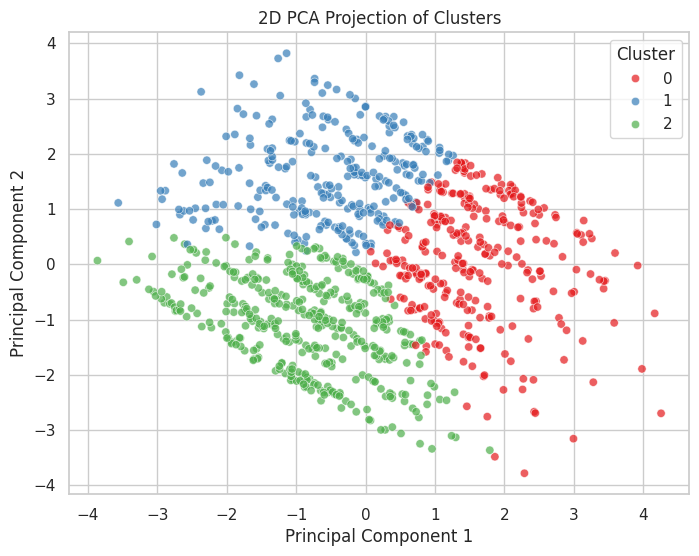

In [ ]:

#  Display cluster sizes to understand how many students fall into each group
print("Cluster counts:")
print(data['cluster'].value_counts())


#  visualize clusters in two dimensions using PCA or t-SNE (if dimensionality reduction desired)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=data['cluster'], palette='Set1', alpha=0.7)
plt.title('2D PCA Projection of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


Using features: ['study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating']


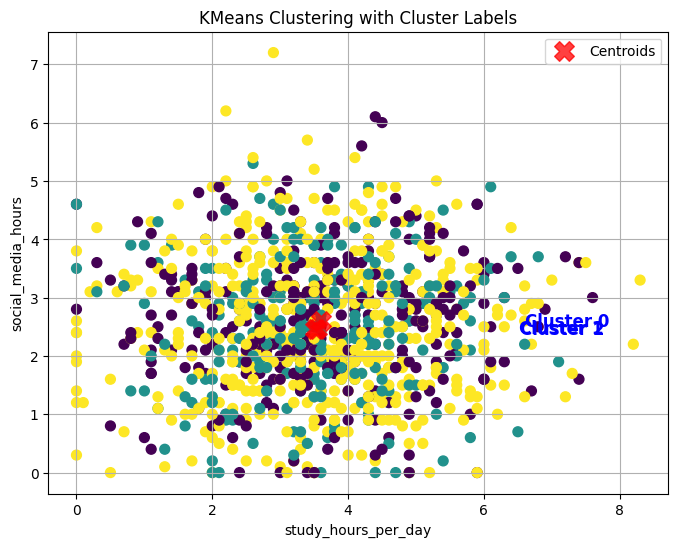


Average Exam Score per Cluster:
   cluster  exam_score
0        0   71.554828
1        1   67.667078
2        2   69.395075


<ipython-input-16-b52bf140efe1>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_scores, x='cluster', y='exam_score', palette='viridis')


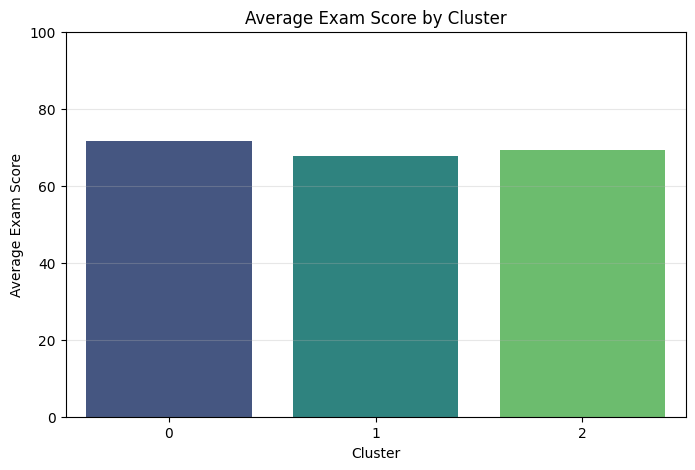


Cluster Profiles (Mean Values):
         study_hours_per_day  social_media_hours  netflix_hours  \
cluster                                                           
0                       3.60                2.60           1.81   
1                       3.51                2.47           1.85   
2                       3.54                2.47           1.81   

         attendance_percentage  sleep_hours  exercise_frequency  \
cluster                                                           
0                        95.26         6.56                2.97   
1                        71.62         6.43                3.07   
2                        83.73         6.43                3.08   

         mental_health_rating  
cluster                        
0                        5.48  
1                        5.55  
2                        5.36  


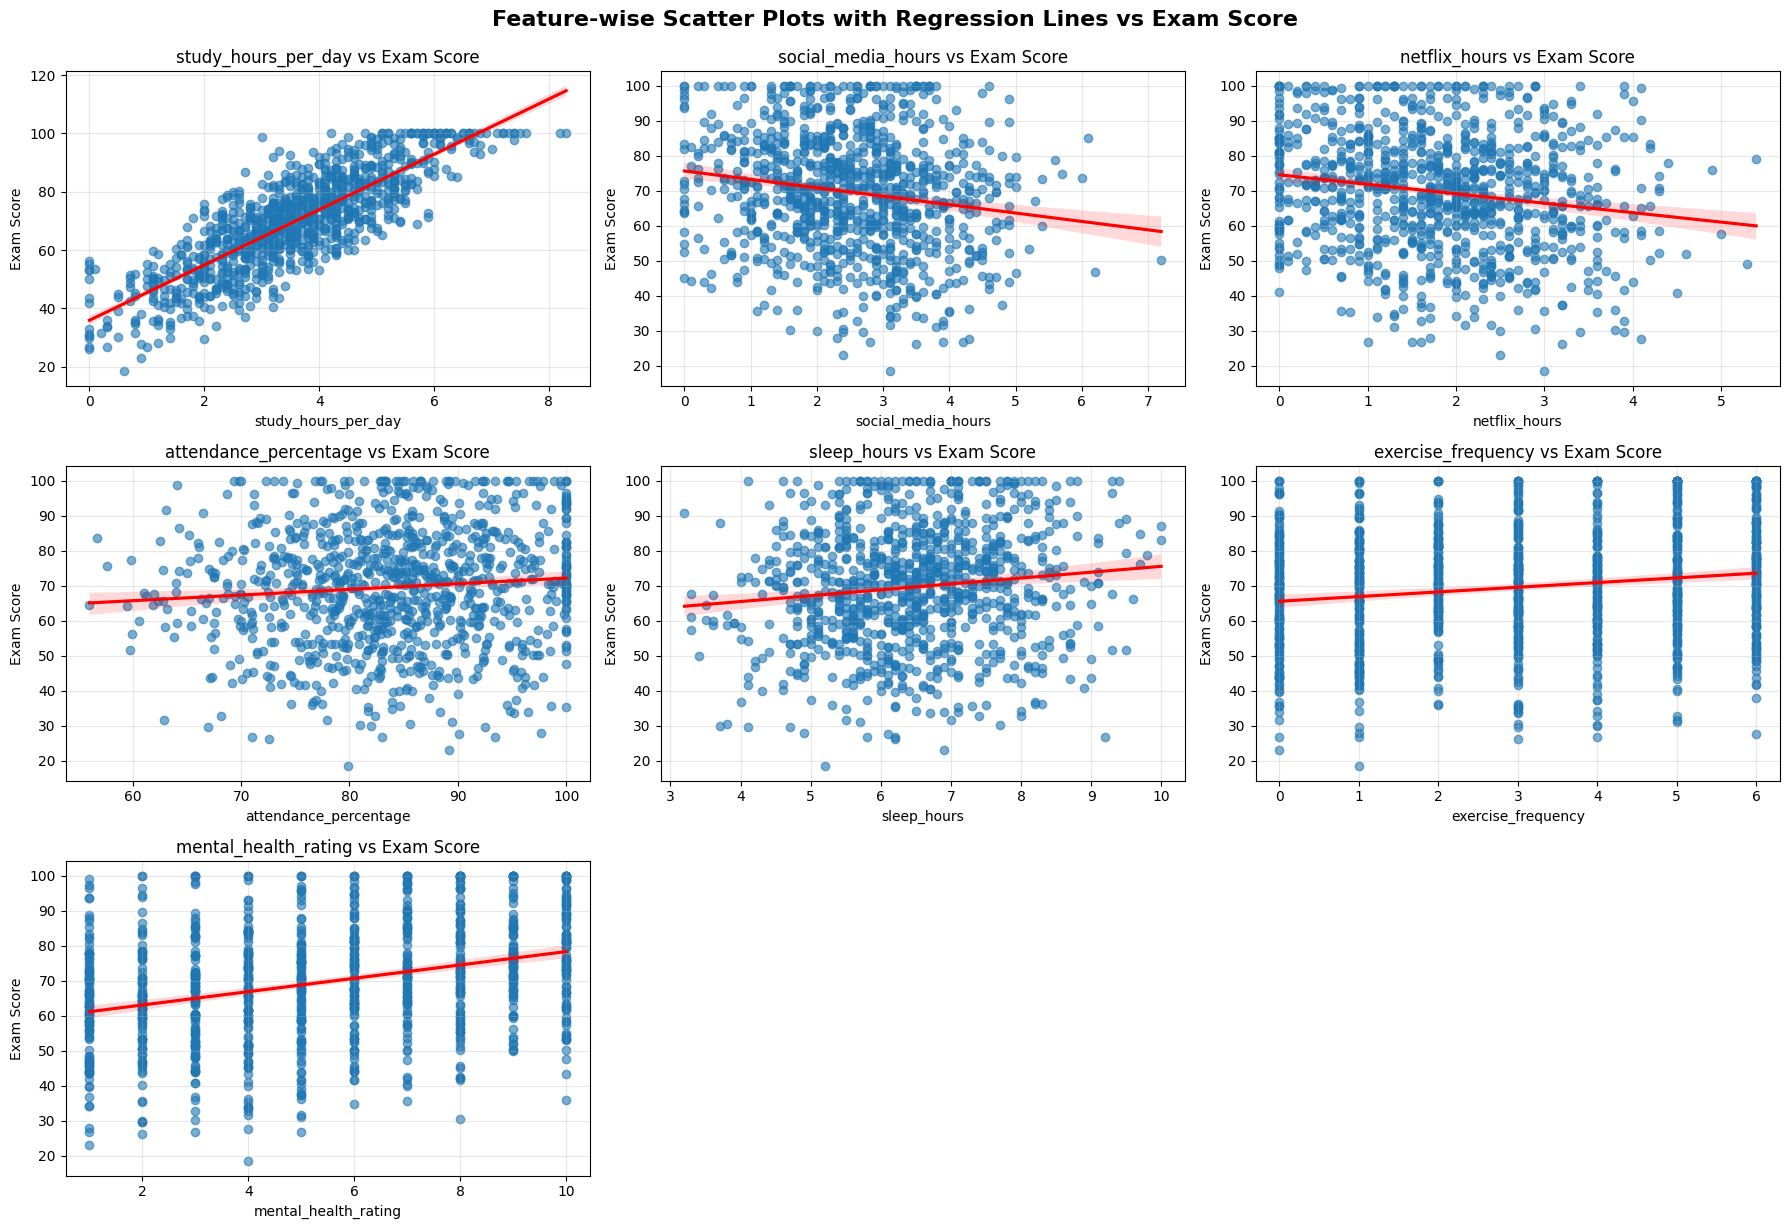

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load your data
data = pd.read_excel('student_habits_performance.xlsx')  # Adjust path if needed

# 2. Select only features that exist in your DataFrame
all_features = [
    'study_hours_per_day', 'social_media_hours', 'netflix_hours',
    'attendance_percentage', 'sleep_hours', 'exercise_frequency',
    'mental_health_rating', 'total_screen_time', 'study_efficiency',
    'attendance_study_interaction', 'mental_health_rating_normalized', 'sleep_quality'
]
features_for_clustering = [f for f in all_features if f in data.columns]
print("Using features:", features_for_clustering)
unscaled_features = data[features_for_clustering].values

# 3. Fit KMeans model
kmeans = KMeans(n_clusters=3, random_state=11)
kmeans.fit(unscaled_features)
predict = kmeans.predict(unscaled_features)
centers = kmeans.cluster_centers_

# 4. Plot the clustered data (first two features)
plt.figure(figsize=(8, 6))
plt.scatter(unscaled_features[:, 0], unscaled_features[:, 1], c=predict, cmap='viridis', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
for idx, (x, y) in enumerate(centers[:, :2]):
    plt.text(x + 3, y, f'Cluster {idx}', fontsize=12, weight='bold',
             ha='left', va='center', color='blue')
plt.title('KMeans Clustering with Cluster Labels')
plt.xlabel(features_for_clustering[0])
plt.ylabel(features_for_clustering[1])
plt.legend()
plt.grid(True)
plt.show()

# 5. Add cluster labels to the DataFrame
data['cluster'] = predict

# 6. Compute and print average exam score per cluster
cluster_scores = data.groupby('cluster')['exam_score'].mean().reset_index()
print("\nAverage Exam Score per Cluster:")
print(cluster_scores)

# 7. Plot average exam score per cluster
plt.figure(figsize=(8, 5))
sns.barplot(data=cluster_scores, x='cluster', y='exam_score', palette='viridis')
plt.title('Average Exam Score by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Exam Score')
plt.ylim(0, 100)
plt.grid(axis='y', alpha=0.3)
plt.show()

# 8. Profile clusters by feature means
features_of_interest = features_for_clustering
cluster_profiles = data.groupby('cluster')[features_of_interest].mean().round(2)
print("\nCluster Profiles (Mean Values):")
print(cluster_profiles)

# 9. Plot: Feature-wise scatterplots with regression lines vs Exam Score
n_features = len(features_of_interest)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(18, n_rows * 4))
for i, feature in enumerate(features_of_interest, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.regplot(data=data, x=feature, y='exam_score', scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
    plt.title(f"{feature} vs Exam Score")
    plt.xlabel(feature)
    plt.ylabel("Exam Score")
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle("Feature-wise Scatter Plots with Regression Lines vs Exam Score", fontsize=16, fontweight='bold', y=1.02)
plt.show()


# 5. Regression Analysis (Supervised Learning)

• Use the following models to predict Final Exam Score:

    o Linear Regression

    o Decision Tree Regressor

    o Random Forest Regressor

• Evaluate models using:

    o MAE, RMSE, and R² score

    o Train/test split and cross-validation


Linear Regression

Mean Squared Error: 25.50
Mean Absolute Error (MAE): 4.11
R² Score: 0.90



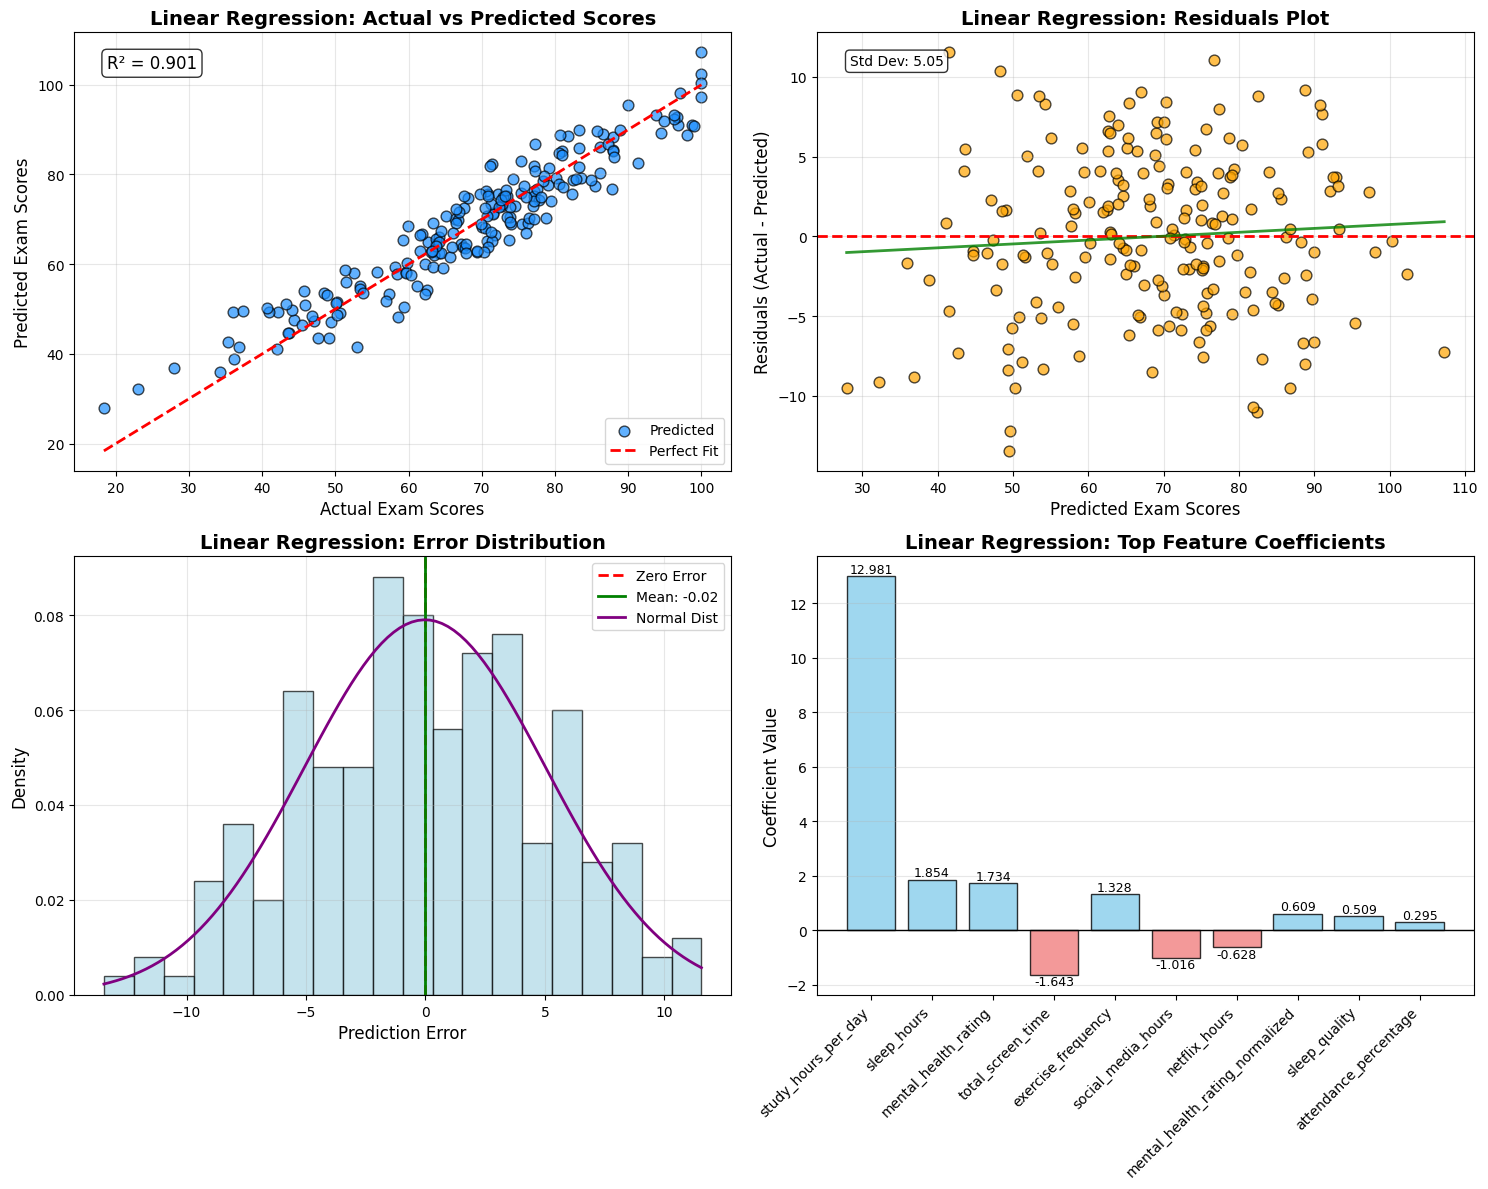

Decision Tree Regressor - Hyperparameter Tuning

Performing Grid Search...
Best parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 20}
Best cross-validation score: 0.7852

Decision Tree Regressor - Final Results

Mean Squared Error: 60.81
Mean Absolute Error (MAE): 6.02
R² Score: 0.76



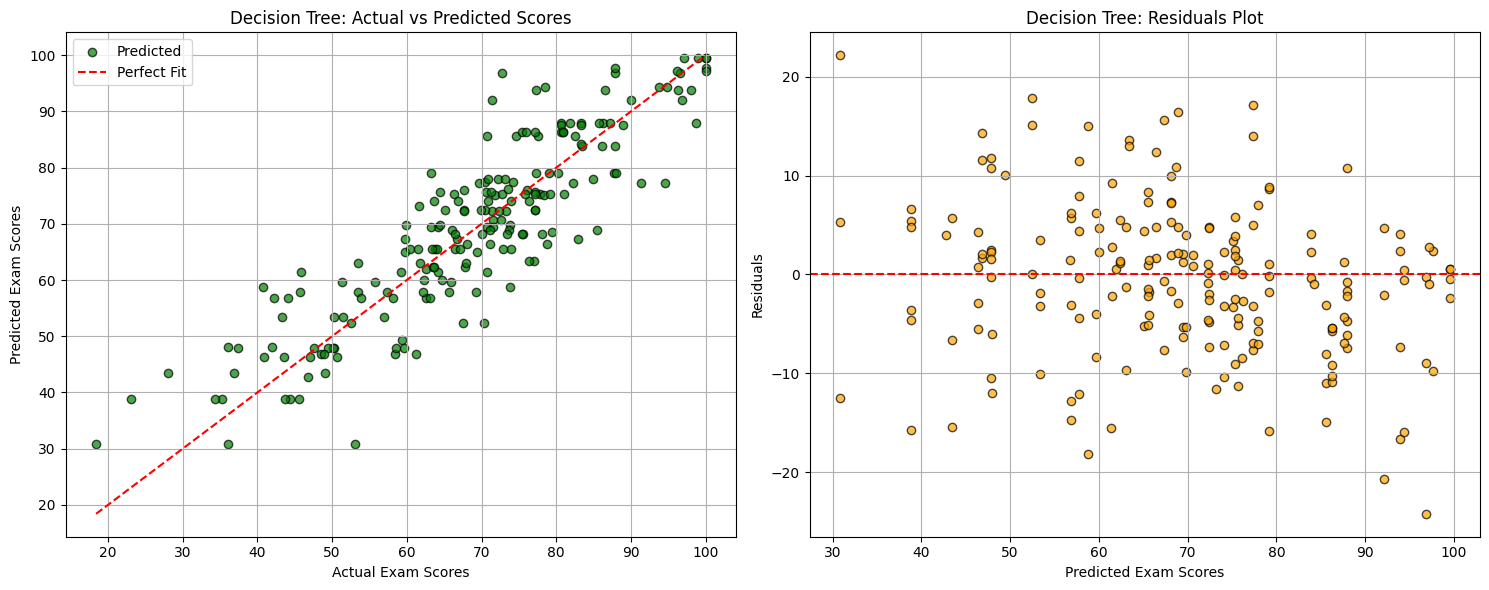

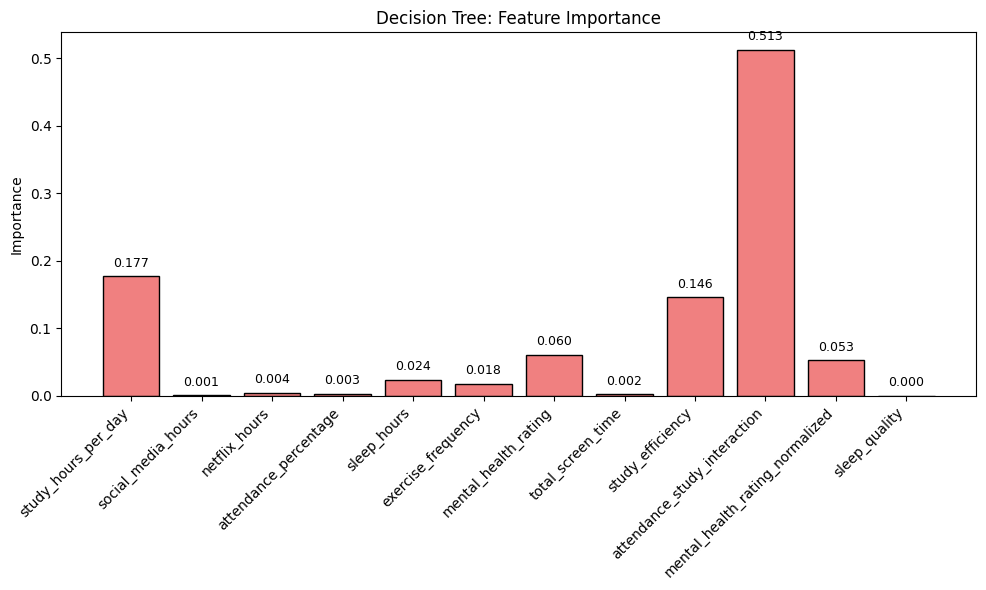

Random Forest Regressor - Hyperparameter Tuning

Performing Grid Search (this may take a few minutes)...
Best parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.8660

Random Forest Regressor - Final Results

Mean Squared Error: 36.15
Mean Absolute Error (MAE): 4.80
R² Score: 0.86



<ipython-input-4-9d9f7ca7fbb7>:310: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(selected_features, rotation=45, ha='right')


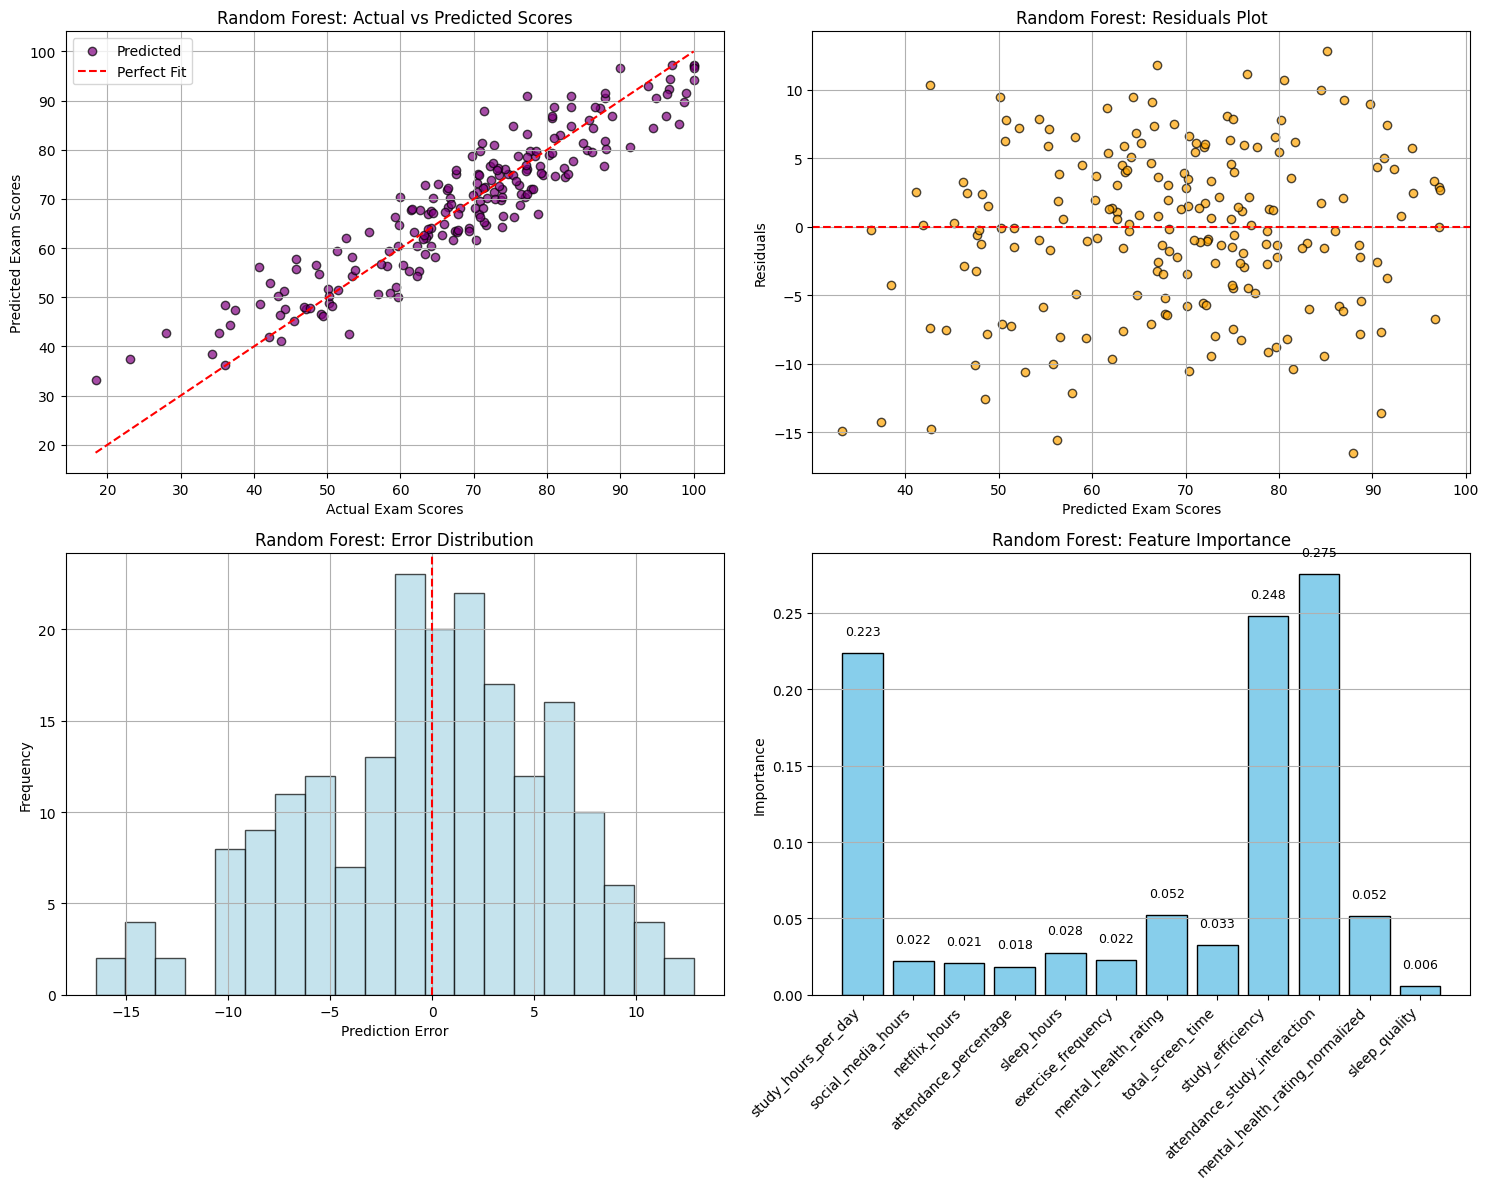

Feature Importance Rankings for Random Forest:
1. attendance_study_interaction: 0.2752
2. study_efficiency: 0.2479
3. study_hours_per_day: 0.2235
4. mental_health_rating: 0.0520
5. mental_health_rating_normalized: 0.0515
6. total_screen_time: 0.0325
7. sleep_hours: 0.0276
8. exercise_frequency: 0.0225
9. social_media_hours: 0.0220
10. netflix_hours: 0.0210
11. attendance_percentage: 0.0184
12. sleep_quality: 0.0059


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import graphviz
from sklearn.tree import export_graphviz

# Load your data into a DataFrame named 'data'
data = pd.read_excel('student_habits_performance.xlsx')

# Feature engineering
data['total_screen_time'] = data['social_media_hours'] + data['netflix_hours']
data['study_efficiency'] = data['study_hours_per_day'] / (data['total_screen_time'] + 1)
data['sleep_quality'] = (data['sleep_hours'] >= 7).astype(int)
data['attendance_study_interaction'] = data['attendance_percentage'] * data['study_hours_per_day']
data['mental_health_rating_normalized'] = (data['mental_health_rating'] - data['mental_health_rating'].mean()) / data['mental_health_rating'].std()

# Prepare features and labels
selected_features = [
    'study_hours_per_day', 'social_media_hours', 'netflix_hours',
    'attendance_percentage', 'sleep_hours', 'exercise_frequency',
    'mental_health_rating', 'total_screen_time', 'study_efficiency',
    'attendance_study_interaction', 'mental_health_rating_normalized', 'sleep_quality'
]

X = data[selected_features]
y = data['exam_score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Linear Regression ---
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

# Evaluate performance
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression\n")
print(f"Mean Squared Error: {mse_lr:.2f}")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"R² Score: {r2_lr:.2f}\n")

# Create comprehensive visualization with multiple subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Original Actual vs Predicted (Enhanced)
ax1.scatter(y_test, y_pred_lr, alpha=0.7, color='dodgerblue', edgecolor='k', label='Predicted', s=60)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=2, label='Perfect Fit')

# Add R² annotation
ax1.text(0.05, 0.95, f'R² = {r2_lr:.3f}', transform=ax1.transAxes,
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
         verticalalignment='top', fontsize=12)

ax1.set_xlabel("Actual Exam Scores", fontsize=12)
ax1.set_ylabel("Predicted Exam Scores", fontsize=12)
ax1.set_title("Linear Regression: Actual vs Predicted Scores", fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Plot 2: Residuals Plot
residuals_lr = y_test - y_pred_lr
ax2.scatter(y_pred_lr, residuals_lr, alpha=0.7, color='orange', edgecolor='k', s=60)
ax2.axhline(y=0, color='red', linestyle='--', linewidth=2)

# Add trend line for residuals
z = np.polyfit(y_pred_lr, residuals_lr, 1)
p = np.poly1d(z)
ax2.plot(sorted(y_pred_lr), p(sorted(y_pred_lr)), color='green', linestyle='-', alpha=0.8, linewidth=2)

ax2.set_xlabel("Predicted Exam Scores", fontsize=12)
ax2.set_ylabel("Residuals (Actual - Predicted)", fontsize=12)
ax2.set_title("Linear Regression: Residuals Plot", fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Add residuals statistics
residual_std_lr = np.std(residuals_lr)
ax2.text(0.05, 0.95, f'Std Dev: {residual_std_lr:.2f}', transform=ax2.transAxes,
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
         verticalalignment='top', fontsize=10)

# Plot 3: Error Distribution Histogram
ax3.hist(residuals_lr, bins=20, alpha=0.7, color='lightblue', edgecolor='k', density=True)
ax3.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
ax3.axvline(x=np.mean(residuals_lr), color='green', linestyle='-', linewidth=2, label=f'Mean: {np.mean(residuals_lr):.2f}')

# Add normal distribution overlay
mu_lr, sigma_lr = np.mean(residuals_lr), np.std(residuals_lr)
x_lr = np.linspace(residuals_lr.min(), residuals_lr.max(), 100)
normal_dist_lr = ((1/(sigma_lr * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_lr - mu_lr) / sigma_lr) ** 2))
ax3.plot(x_lr, normal_dist_lr, 'purple', linewidth=2, label='Normal Dist')

ax3.set_xlabel("Prediction Error", fontsize=12)
ax3.set_ylabel("Density", fontsize=12)
ax3.set_title("Linear Regression: Error Distribution", fontsize=14, fontweight='bold')
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3)

# Plot 4: Model Coefficients (Feature Importance equivalent)
feature_names = selected_features
coefficients_lr = model_lr.coef_

# Sort coefficients by absolute value
abs_coef_lr = np.abs(coefficients_lr)
indices_lr = np.argsort(abs_coef_lr)[::-1]

# Limit to top N features
top_n = 10
top_indices_lr = indices_lr[:top_n]

colors_lr = ['skyblue' if coef >= 0 else 'lightcoral' for coef in coefficients_lr[top_indices_lr]]
bars_lr = ax4.bar(range(top_n), coefficients_lr[top_indices_lr], color=colors_lr, edgecolor='k', alpha=0.8)

ax4.set_xticks(range(top_n))
ax4.set_xticklabels([feature_names[i] for i in top_indices_lr], rotation=45, ha='right')
ax4.set_title("Linear Regression: Top Feature Coefficients", fontsize=14, fontweight='bold')
ax4.set_ylabel("Coefficient Value", fontsize=12)
ax4.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax4.grid(True, axis='y', alpha=0.3)

# Add value labels on bars
for bar, coef in zip(bars_lr, coefficients_lr[top_indices_lr]):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + (0.01 if height >= 0 else -0.01),
            f'{coef:.3f}', ha='center', va='bottom' if height >= 0 else 'top', fontsize=9)

plt.tight_layout()
plt.show()

# --- Decision Tree Regressor ---
# Define hyperparameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None]
}

# Create Decision Tree model
dt_model = DecisionTreeRegressor(random_state=11)

# Perform Grid Search with Cross Validation
print("Decision Tree Regressor - Hyperparameter Tuning\n")
print("Performing Grid Search...")

grid_search_dt = GridSearchCV(
    dt_model,
    param_grid_dt,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=0
)

# Fit the grid search
grid_search_dt.fit(X_train, y_train)

# Get the best model
best_dt_model = grid_search_dt.best_estimator_

print(f"Best parameters: {grid_search_dt.best_params_}")
print(f"Best cross-validation score: {grid_search_dt.best_score_:.4f}\n")

# Make predictions with the best model
y_pred_dt = best_dt_model.predict(X_test)

# Evaluate performance
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Regressor - Final Results\n")
print(f"Mean Squared Error: {mse_dt:.2f}")
print(f"Mean Absolute Error (MAE): {mae_dt:.2f}")
print(f"R² Score: {r2_dt:.2f}\n")

# Create visualization for Decision Tree
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Actual vs Predicted
ax1.scatter(y_test, y_pred_dt, alpha=0.7, color='green', edgecolor='k', label='Predicted')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', label='Perfect Fit')
ax1.set_xlabel("Actual Exam Scores")
ax1.set_ylabel("Predicted Exam Scores")
ax1.set_title("Decision Tree: Actual vs Predicted Scores")
ax1.legend()
ax1.grid(True)

# Plot 2: Residuals plot
residuals_dt = y_test - y_pred_dt
ax2.scatter(y_pred_dt, residuals_dt, alpha=0.7, color='orange', edgecolor='k')
ax2.axhline(y=0, color='red', linestyle='--')
ax2.set_xlabel("Predicted Exam Scores")
ax2.set_ylabel("Residuals")
ax2.set_title("Decision Tree: Residuals Plot")
ax2.grid(True)

plt.tight_layout()
plt.show()

# Feature importance visualization for Decision Tree
importances_dt = best_dt_model.feature_importances_
plt.figure(figsize=(10, 6))
bars_dt = plt.bar(selected_features, importances_dt, color='lightcoral', edgecolor='k')
plt.title("Decision Tree: Feature Importance")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Importance")

# Add value labels on bars
for bar, imp in zip(bars_dt, importances_dt):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{imp:.3f}', ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

# --- Random Forest Regressor ---
# Define hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Create Random Forest model
rf_model = RandomForestRegressor(random_state=11)

# Perform Grid Search with Cross Validation
print("Random Forest Regressor - Hyperparameter Tuning\n")
print("Performing Grid Search (this may take a few minutes)...")

grid_search_rf = GridSearchCV(
    rf_model,
    param_grid_rf,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=0
)

# Fit the grid search
grid_search_rf.fit(X_train, y_train)

# Get the best model
best_rf_model = grid_search_rf.best_estimator_

print(f"Best parameters: {grid_search_rf.best_params_}")
print(f"Best cross-validation score: {grid_search_rf.best_score_:.4f}\n")

# Make predictions with the best model
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor - Final Results\n")
print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}\n")

# Create comprehensive visualization for Random Forest
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Actual vs Predicted
ax1.scatter(y_test, y_pred_rf, alpha=0.7, color='purple', edgecolor='k', label='Predicted')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', label='Perfect Fit')
ax1.set_xlabel("Actual Exam Scores")
ax1.set_ylabel("Predicted Exam Scores")
ax1.set_title("Random Forest: Actual vs Predicted Scores")
ax1.legend()
ax1.grid(True)

# Plot 2: Residuals plot
residuals_rf = y_test - y_pred_rf
ax2.scatter(y_pred_rf, residuals_rf, alpha=0.7, color='orange', edgecolor='k')
ax2.axhline(y=0, color='red', linestyle='--')
ax2.set_xlabel("Predicted Exam Scores")
ax2.set_ylabel("Residuals")
ax2.set_title("Random Forest: Residuals Plot")
ax2.grid(True)

# Plot 3: Prediction Error Distribution
ax3.hist(residuals_rf, bins=20, alpha=0.7, color='lightblue', edgecolor='k')
ax3.set_xlabel("Prediction Error")
ax3.set_ylabel("Frequency")
ax3.set_title("Random Forest: Error Distribution")
ax3.axvline(x=0, color='red', linestyle='--')
ax3.grid(True)

# Plot 4: Feature Importance for Random Forest
importances_rf = best_rf_model.feature_importances_
ax4.bar(selected_features, importances_rf, color='skyblue', edgecolor='k')
ax4.set_title("Random Forest: Feature Importance")
ax4.set_ylabel("Importance")
ax4.set_xticklabels(selected_features, rotation=45, ha='right')
ax4.grid(True, axis='y')

# Add value labels on bars
for i, v in enumerate(importances_rf):
    ax4.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Print feature importance rankings for Random Forest
print("Feature Importance Rankings for Random Forest:")
feature_importance_df_rf = list(zip(selected_features, importances_rf))
feature_importance_df_rf.sort(key=lambda x: x[1], reverse=True)

for i, (feature, importance) in enumerate(feature_importance_df_rf, 1):
    print(f"{i}. {feature}: {importance:.4f}")


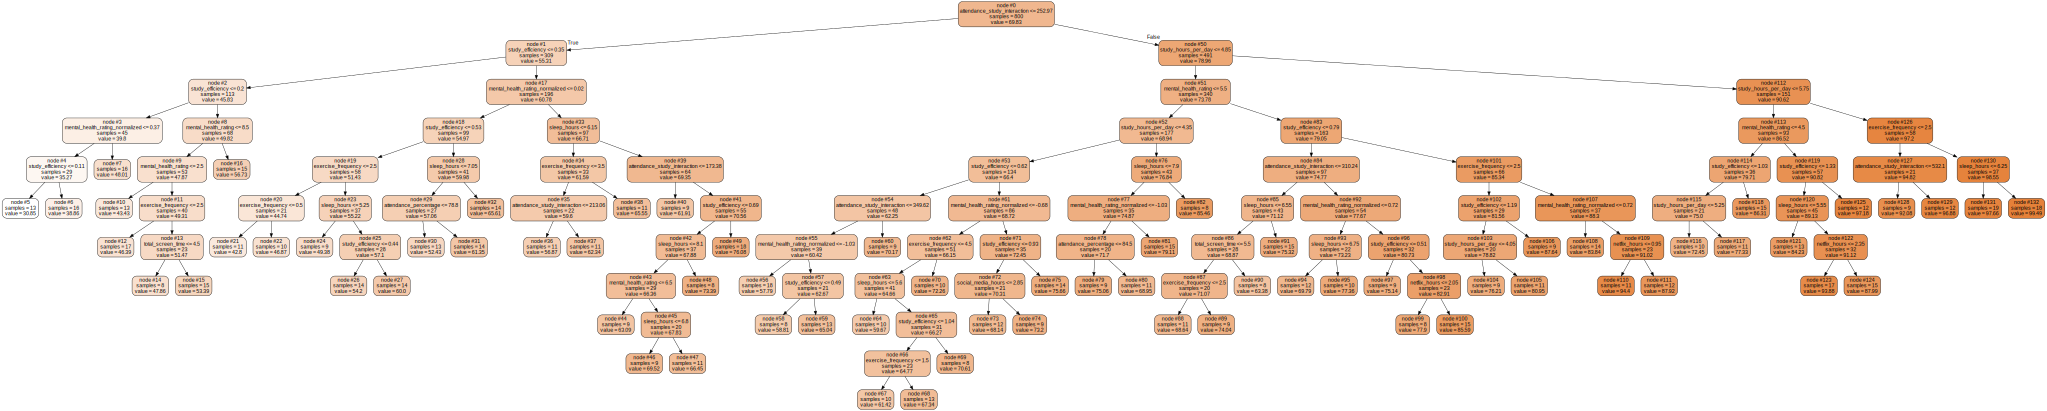

In [ ]:
!pip install graphviz

from sklearn.tree import export_graphviz
import graphviz

# Define the feature names based on the specified features
feature_names = [
    'study_hours_per_day', 'social_media_hours', 'netflix_hours',
    'attendance_percentage', 'sleep_hours', 'exercise_frequency',
    'mental_health_rating', 'total_screen_time', 'study_efficiency',
    'attendance_study_interaction', 'mental_health_rating_normalized', 'sleep_quality'
]

# Export the tree to a DOT file
dot_data = export_graphviz(best_dt_model,
                           feature_names=feature_names,
                           filled=True,
                           rounded=True,
                           impurity=False,
                           node_ids=True,  # Optional: Include node IDs
                           proportion=False,  # Optional: Show sample count instead of percentage
                           precision=2)  # Optional: Number of decimal places for thresholds

# Render the DOT file to a PNG or view directly
graph = graphviz.Source(dot_data)
graph.render("decision_tree", view=True)  # Saves as decision_tree.pdf and opens it
display(graph)


                        MAE      RMSE        R²     CV R²
Linear Regression  4.110555  5.050032  0.900546  0.897324
Decision Tree      6.945500  8.826792  0.696165  0.688763
Random Forest      4.790565  6.023605  0.858503  0.864194


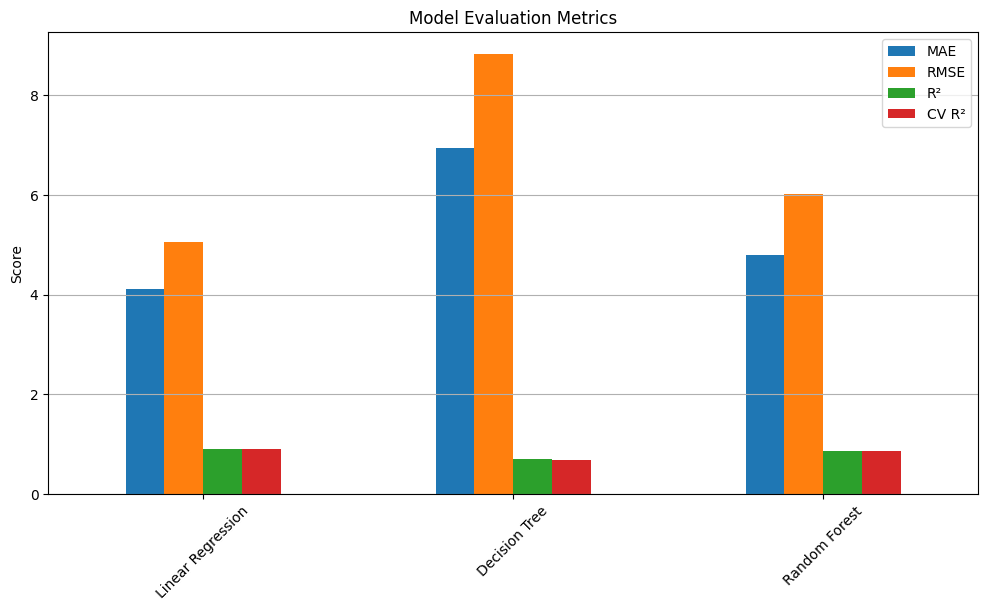

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load your data into a DataFrame named 'data'
data = pd.read_excel('student_habits_performance.xlsx')

# Feature engineering
data['total_screen_time'] = data['social_media_hours'] + data['netflix_hours']
data['study_efficiency'] = data['study_hours_per_day'] / (data['total_screen_time'] + 1)
data['sleep_quality'] = (data['sleep_hours'] >= 7).astype(int)
data['attendance_study_interaction'] = data['attendance_percentage'] * data['study_hours_per_day']
data['mental_health_rating_normalized'] = (data['mental_health_rating'] - data['mental_health_rating'].mean()) / data['mental_health_rating'].std()

# Prepare features and labels
selected_features = [
    'study_hours_per_day', 'social_media_hours', 'netflix_hours',
    'attendance_percentage', 'sleep_hours', 'exercise_frequency',
    'mental_health_rating', 'total_screen_time', 'study_efficiency',
    'attendance_study_interaction', 'mental_health_rating_normalized', 'sleep_quality'
]

X = data[selected_features]
y = data['exam_score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Store results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[model_name] = {
        "MAE": mae,
        "RMSE": rmse,
        "R²": r2
    }

    # Cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    results[model_name]["CV R²"] = np.mean(cv_scores)

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

# Visualize the results
results_df[['MAE', 'RMSE', 'R²', 'CV R²']].plot(kind='bar', figsize=(12, 6))
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# 6. Optional Classification Task

• Convert scores into performance levels:

    o Low (bottom 33%), Average (middle 34%), High (top 33%)

• Train classification models (e.g., Logistic Regression, Decision Tree)

• Evaluate with confusion matrix, accuracy, and F1-score


Logistic Regression Model Evaluation:
Confusion Matrix:
 [[54  3  0]
 [14 34 11]
 [ 0 12 54]]
Accuracy: 0.7802197802197802
F1 Score: 0.7736723180692646
              precision    recall  f1-score   support

           0       0.79      0.95      0.86        57
           1       0.69      0.58      0.63        59
           2       0.83      0.82      0.82        66

    accuracy                           0.78       182
   macro avg       0.77      0.78      0.77       182
weighted avg       0.77      0.78      0.77       182



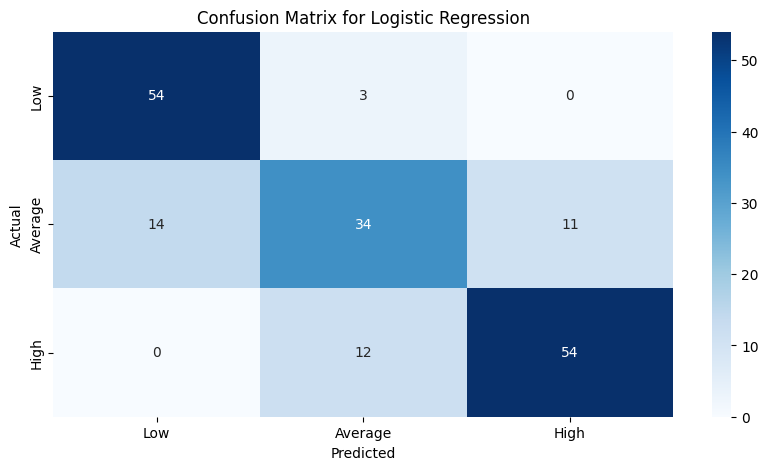

<ipython-input-2-17b5b7bb13da>:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef_df.iloc[i, :-1], y=feature_names,
<ipython-input-2-17b5b7bb13da>:95: UserWarning: 
The palette list has fewer values (1) than needed (18) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=coef_df.iloc[i, :-1], y=feature_names,
<ipython-input-2-17b5b7bb13da>:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef_df.iloc[i, :-1], y=feature_names,
<ipython-input-2-17b5b7bb13da>:95: UserWarning: 
The palette list has fewer values (1) than needed (18) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=coef_df.iloc[i, :-1], y=feature_names,
<ipython-input-2-1

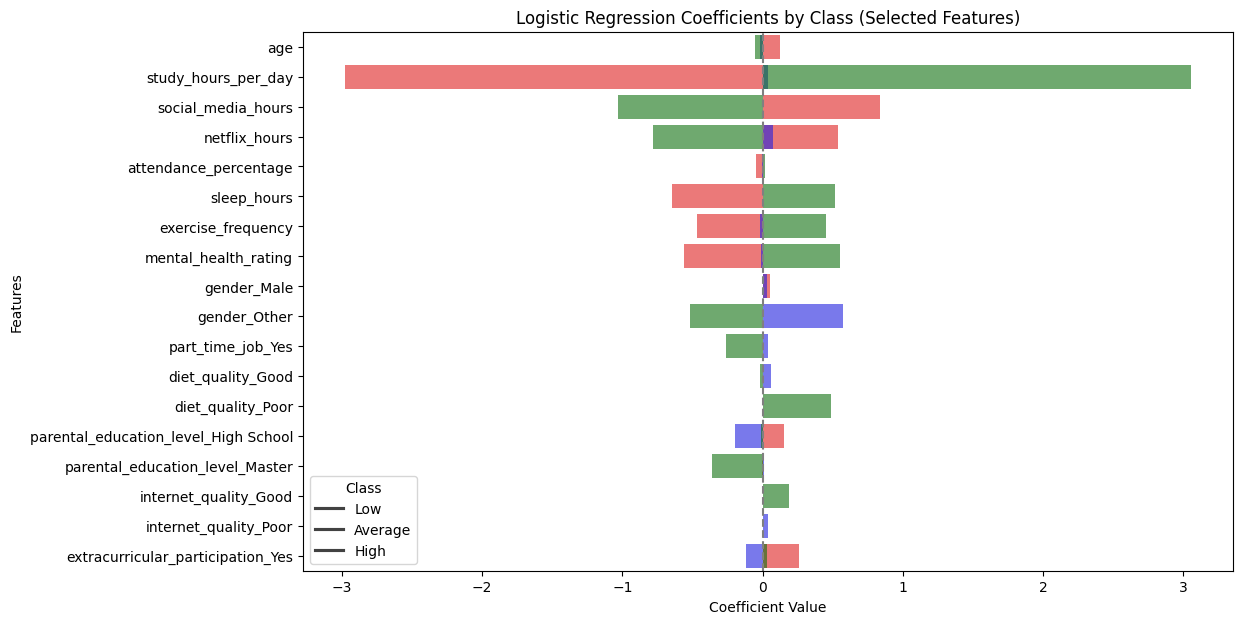


Decision Tree Classifier Model Evaluation:
Confusion Matrix:
 [[45  9  3]
 [ 8 35 16]
 [ 1 16 49]]
Accuracy: 0.7087912087912088
F1 Score: 0.7098393147559082
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        57
           1       0.58      0.59      0.59        59
           2       0.72      0.74      0.73        66

    accuracy                           0.71       182
   macro avg       0.71      0.71      0.71       182
weighted avg       0.71      0.71      0.71       182



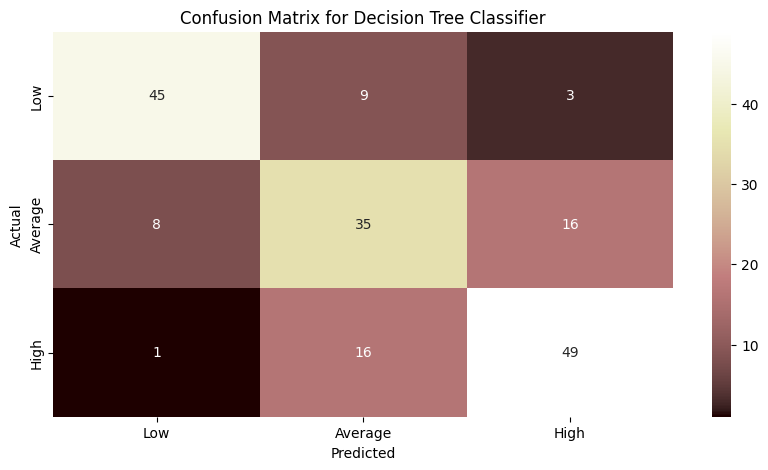

In [ ]:


# Extract the final exam scores
exam_scores = data['exam_score']

# Create performance levels based on final exam scores
def categorize_performance(score):
    if score < exam_scores.quantile(0.33):
        return 'Low'
    elif score < exam_scores.quantile(0.67):
        return 'Average'
    else:
        return 'High'

# Apply the categorization
data['performance_level'] = exam_scores.apply(categorize_performance)

# Encode the performance levels into numerical values
data['performance_level'] = data['performance_level'].map({'Low': 0, 'Average': 1, 'High': 2})

# Drop rows with missing values
data = data.dropna()

# Select features and target variable
X = data.drop(columns=['exam_score', 'performance_level'])
y = data['performance_level']

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model with L1 regularization for feature selection
logistic_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
logistic_model.fit(X_train, y_train)

# Use SelectFromModel to select important features
sfm = SelectFromModel(logistic_model, threshold='mean')
sfm.fit(X_train, y_train)

# Transform the X training and test sets
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

# Retrain the Logistic Regression model with selected important features
logistic_model.fit(X_important_train, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_important_test)

# Evaluate Logistic Regression model
print("\nLogistic Regression Model Evaluation:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("F1 Score:", f1_score(y_test, y_pred_logistic, average='weighted'))
print(classification_report(y_test, y_pred_logistic))

# Visualize the confusion matrix for Logistic Regression
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
labels = ['Low', 'Average', 'High']

plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plotting Logistic Regression Coefficients by Class
coefficients = logistic_model.coef_
feature_names = X.columns[sfm.get_support()]  # Use only important features
# Prepare data for plotting
coef_df = pd.DataFrame(coefficients, columns=feature_names)
coef_df['Class'] = ['Low', 'Average', 'High']
# Set colors for each class
color_map = {'Low': 'red', 'Average': 'blue', 'High': 'green'}
# Visualization
plt.figure(figsize=(12, 7))
# Loop to plot each class separately
for i in range(len(coef_df)):
    sns.barplot(x=coef_df.iloc[i, :-1], y=feature_names,
                palette=[color_map[coef_df['Class'][i]]],
                alpha=0.6, label=coef_df['Class'][i] if i == 0 else "")
plt.axvline(0, color='grey', linestyle='--')
plt.title('Logistic Regression Coefficients by Class (Selected Features)')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.legend(title='Class', labels=['Low', 'Average', 'High'])
plt.show()

# Train Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_important_train, y_train)

# Make predictions for Decision Tree
y_pred_tree = tree_model.predict(X_important_test)

# Evaluate Decision Tree model
print("\nDecision Tree Classifier Model Evaluation:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("F1 Score:", f1_score(y_test, y_pred_tree, average='weighted'))
print(classification_report(y_test, y_pred_tree))

# Visualize the confusion matrix for Decision Tree
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='pink', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**IV. Interpretation and Insights**

Prepare a dedicated section in your notebook summarizing your analysis and conclusions. Your insights
should include:

# A. Feature Importance

• For tree-based models, plot and analyze feature importance

• For linear models, interpret coefficients

• Identify the top 3–5 features that most affect performance

Tree Based Model: Decision Tree
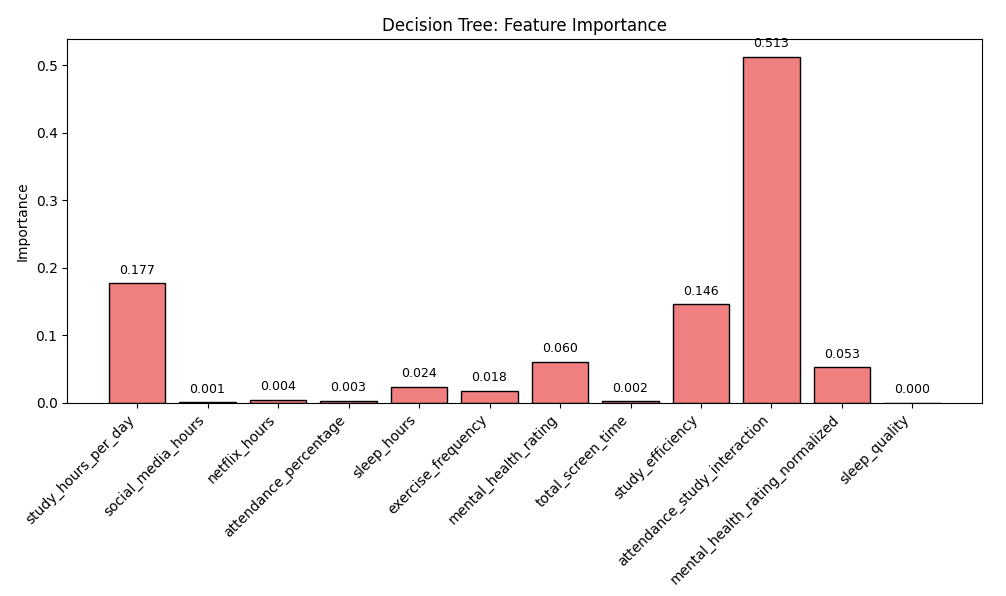



attendance_study_interaction (0.513) is by far the most important feature, accounting for over half the model's predictive power. This suggests that the combination of class attendance and study habits working together is the strongest predictor of academic success.The remaining features have much lower individual importance, but several still contribute meaningfully to performance prediction.

Based on the feature importance scores, here are the 3 most influential factors:

1. attendance_study_interaction (0.513)
2. study_hours_per_day (0.177)
3. study_efficiency (0.146)

Tree Based Model: Random Forest

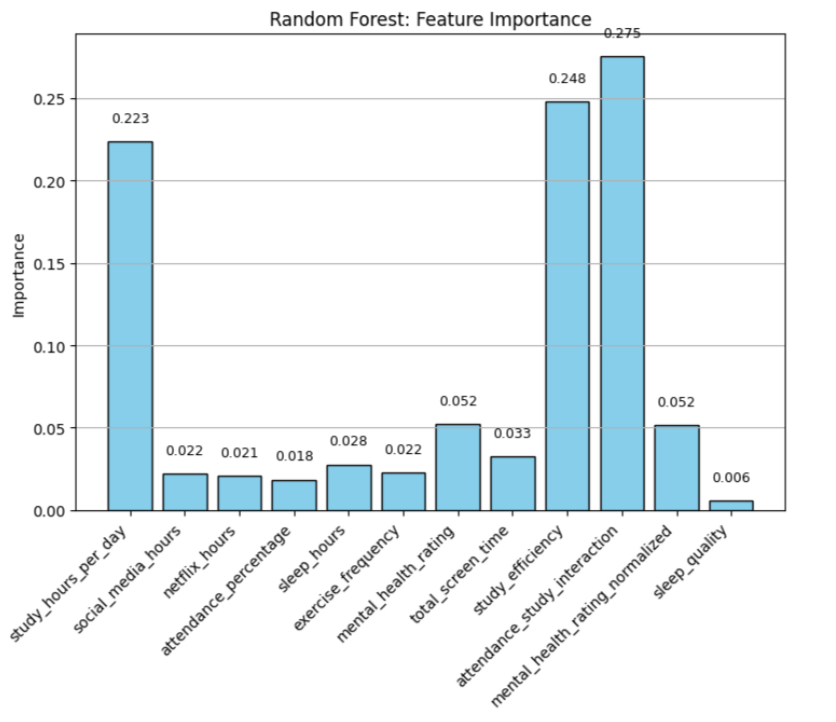

Unlike the Decision Tree where one feature dominated, the Random Forest shows a more distributed importance across multiple factors, suggesting that academic success depends on several key areas working together. The model still identifies interaction terms as highly valuable, but balances them with individual behavioral factors.

Based on the Random Forest feature importance scores:

1. attendance_study_interaction (0.275)
2. study_efficiency (0.248)
3. study_hours_per_day (0.223)

Tree Based Model: Linear Regression
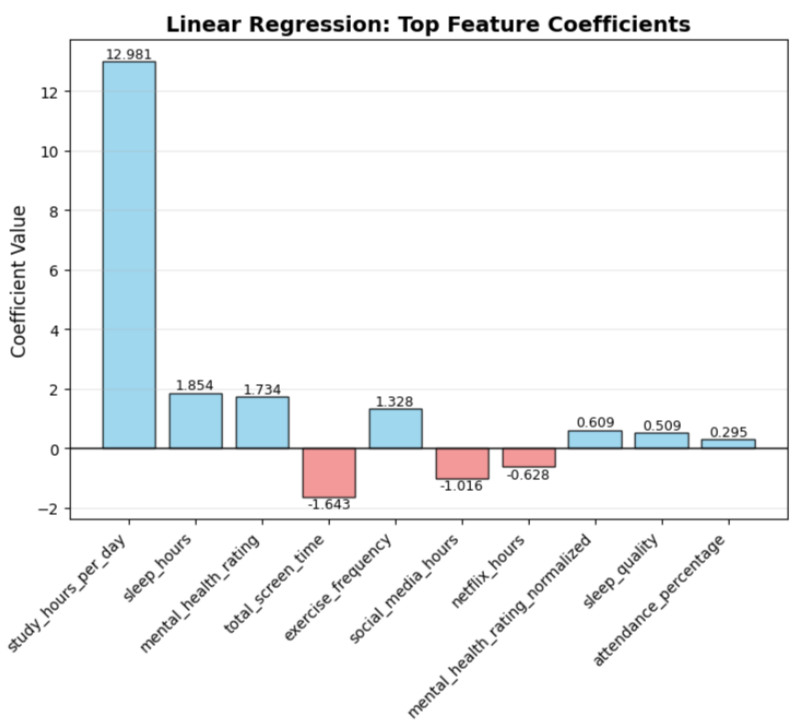

Linear Regression model shows the direct linear relationship between each feature and academic performance. Unlike tree-based models that show feature importance, these coefficients tell us the magnitude and direction of each factor's impact on scores. study_hours_per_day (12.981) has an extraordinarily strong positive impact - each additional study hour per day increases performance by nearly 13 points. The model clearly separates factors that boost performance (positive coefficients) from those that hurt it (negative coefficients in red).

Based on coefficient magnitude (absolute values), here is the top 5 that affects performance:

1. study_hours_per_day (+12.981)
2. sleep_hours (+1.854)
3. mental_health_rating (+1.734)
4. total_screen_time (-1.643) - NEGATIVE
5. exercise_frequency (+1.328)

Logistic Regression Coefficients by Class
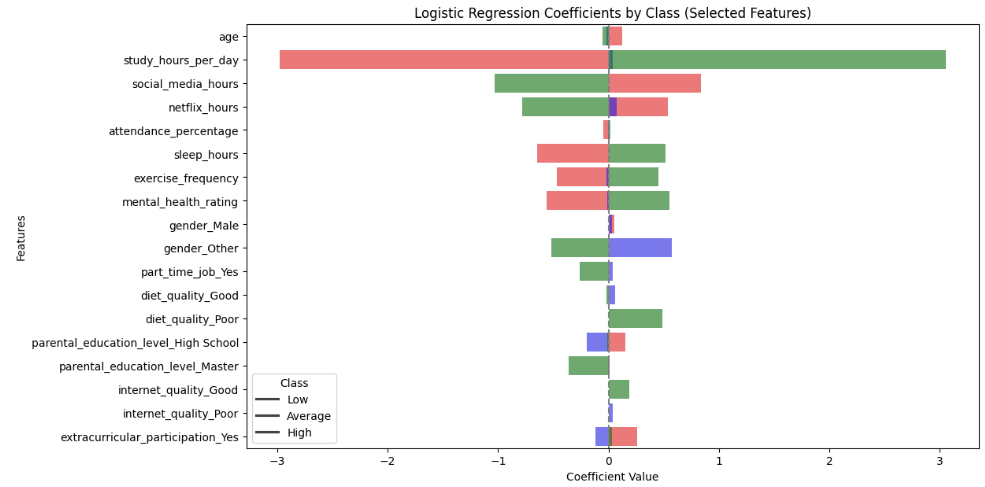

Logistic Regression model predicts academic performance categories (Low/Average/High) and shows how each feature influences the probability of falling into each performance class. Features show consistent directional effects across performance levels - what helps achieve high performance typically hurts low performance (and vice versa).


Based on coefficient magnitude and consistency across classes, here is the top 5 that affects performance:
1. study_hours_per_day - Strongest predictor overall

High Performance: Massive positive coefficient
Low Performance: Large negative coefficient


2. social_media_hours

High Performance: Strong negative coefficient
Low Performance: Positive coefficient



3. netflix_hours

High Performance: Negative coefficient
Low Performance: Positive coefficient



4. attendance_percentage


5. mental_health_rating - Well-being foundation

# B. Cluster Profiling

• For each cluster:

    o Describe common behaviors (e.g., “Cluster 1 sleeps less, studies more”)

    o Associate average exam scores with each group

    o Comment on trends you observe (e.g., does screen time correlate with lower scores?)


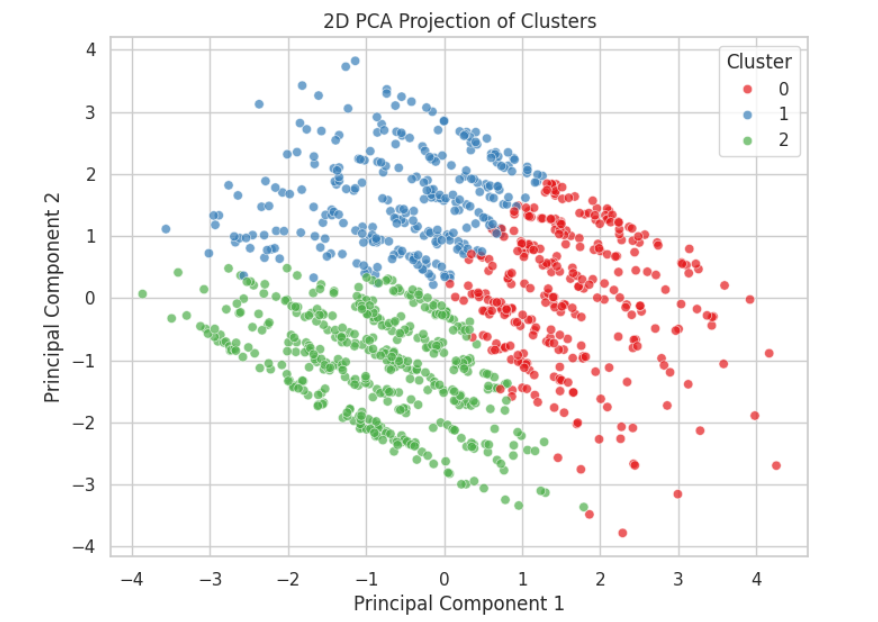

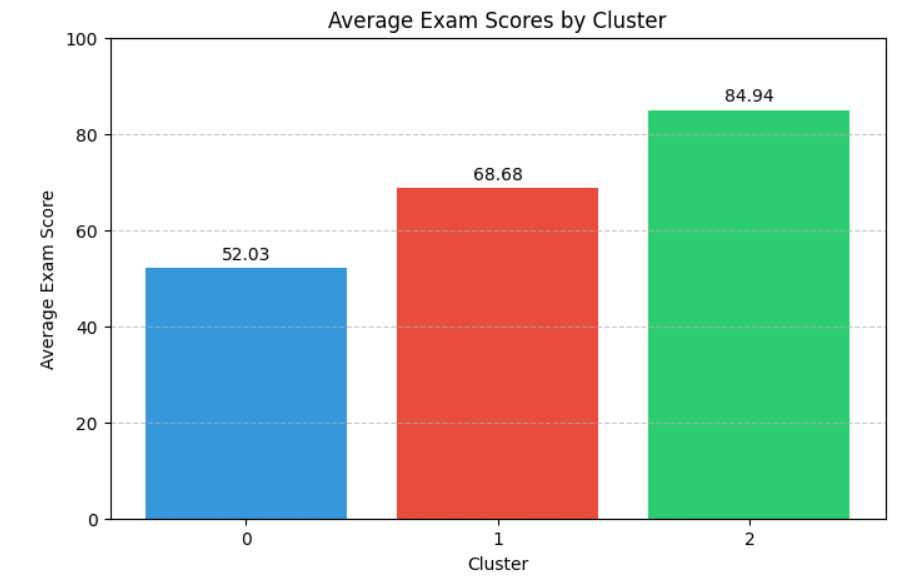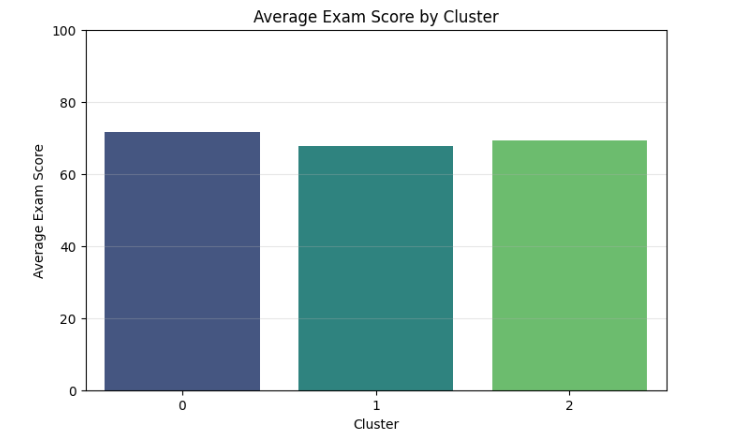

**Cluster 0**

Average Exam Score: 71.56 (highest among clusters)

Habits Profile:

Study Hours Per Day: 3.60

Social Media Hours: 2.60

Netflix Hours: 1.81

Attendance Percentage: 95.26% (highest attendance)

Sleep Hours: 6.56

Exercise Frequency: 2.97

Mental Health Rating: 5.48   

Interpretation:

Cluster 0 consists of students with the highest attendance, slightly above-average study hours, and average to good mental health. They also achieve the highest average exam scores. Good attendance seems correlated with better performance in this group.    

   

**Cluster 1**

Average Exam Score: 67.67 (lowest among clusters)

Habits Profile:

Study Hours Per Day: 3.51

Social Media Hours: 2.47

Netflix Hours: 1.85

Attendance Percentage: 71.62% (lowest attendance)

Sleep Hours: 6.43

Exercise Frequency: 3.07

Mental Health Rating: 5.55 (highest among clusters)    

Interpretation:

Cluster 1 students have the lowest attendance but the best mental health ratings. Their study hours and screen time are similar to others. Despite their good mental health, their average exam score is the lowest, suggesting that attendance might have a stronger link to academic success than mental health alone in this group.    

   

**Cluster 2**

Average Exam Score: 69.40

Habits Profile:

Study Hours Per Day: 3.54

Social Media Hours: 2.47

Netflix Hours: 1.81

Attendance Percentage: 83.73% (middle range)

Sleep Hours: 6.43

Exercise Frequency: 3.08 (highest exercise frequency)

Mental Health Rating: 5.36    

Interpretation:

Cluster 2 students have moderate attendance, slightly less study time, and the most frequent exercise. Their mental health rating is a bit lower than others, and their exam scores are in the middle.    

# C. Model Performance

• Which model performed best? Why?

• Are there trade-offs between interpretability and accuracy?


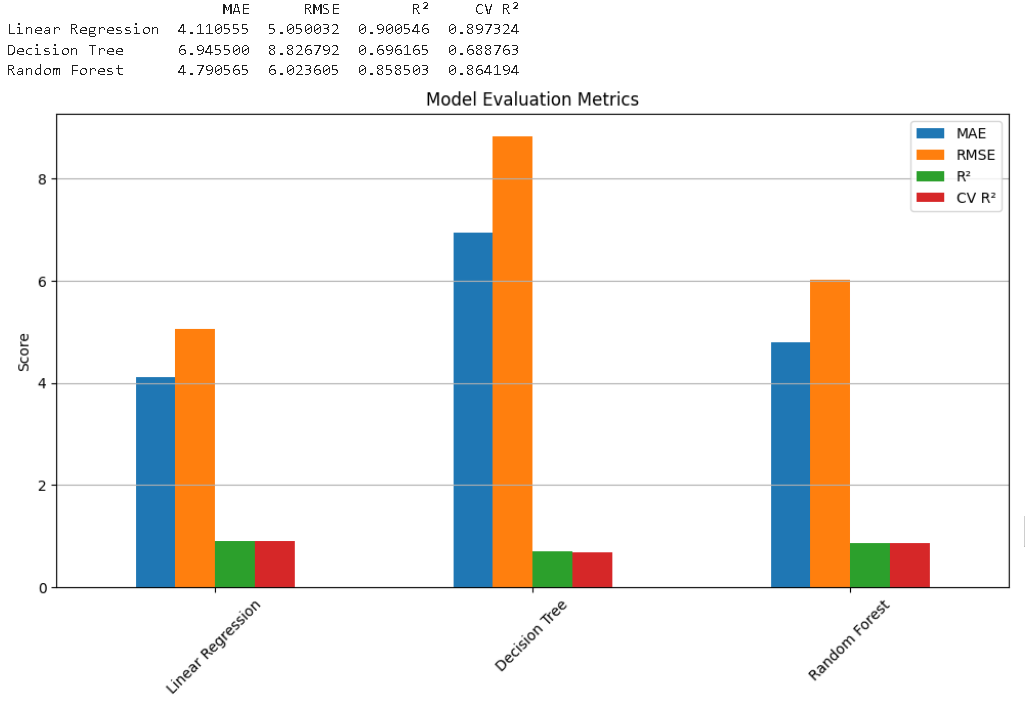

Linear Regression Model performed best among the other models. It has the lowest MAE (Mean Absolute Error) and RMSE (Root Mean Square Error) which indicates lower error which leads to good performance. It also has high R² (Coefficient of Determination) and CV R² (Cross-Validation R²) which indicates a very good predictive performance.

linear model is a simpler model unlike the other two models. It is more interpretable but it may not capture complex relationships in data.

# D. Real-World Implications

• What advice could you give students based on your findings?

• Are there surprising or counterintuitive results?




*   Create a study schedule that spreads preparation over multiple days, allowing time for review and practice. Maintain regular sleep patterns during exam periods—your brain needs rest to process and retain information effectively. Incorporating regular physical exercise, and prioritizing your mental well-being also helps to perform well on exams.

*   Having good internet quality also helps and that the diet quality almost have no effect on your exam scores whether good or bad.






# **Problem Solutions**

# How do various lifestyle factors influence the academic performance of students in examinations?


1. How does lifestyle habits (positive or negative) of students today affect the academic performance in examinations?
based on the charts using linear and logistic regression positive lifestyle factors like long hours of studying, efficient studying, regulr sleep hours, attendance in class, and good mental well being will significantly affect performance in examninations. While, negative lifestyle habits like social media hours matched with other negative lifestyle habits will consequently result in low exam scores.

2. Does having a part time job or extracurricular participation affect exam scores negatively?
based on the findings it has little to no affect on exam scores.

3. Does the educational level of parents affect the student's academic performance in examinations?
based on the chart, it is slightly on the negative side but it has little effect on exam scores.

4. Does the internet quality affects study hours of students? if the internet is good does the students lean more on studying or streaming on netflix and scrolling on social media?
based on the charts having good internet quality tends to lean on the positive side with high scores. It slightly affects the exam score.

